# Bilbiotecas


In [1]:
import os
import re
import time
import string
import tempfile
import numpy as np
import pandas as pd
import statistics as st
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from datasets import load_dataset
from symspellpy import SymSpell, Verbosity
import torch
from torch import nn
from transformers import Trainer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Image
from reportlab.lib import colors
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay
import pickle
import emoji
import spacy
import pdfplumber
import fitz  
import contractions
from contractions import fix
from ftfy import fix_text
import wordninja
from deep_translator import GoogleTranslator
from tensorflow.keras.layers import SpatialDropout1D, LSTM, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, GRU, Bidirectional
from spellchecker import SpellChecker
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords, words as nltk_words,  wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from pywsd.lesk import simple_lesk
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
import nltk
import neattext as nt
from sklearn.utils import resample
import language_tool_python
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from scipy.stats import spearmanr, pearsonr, skew, kendalltau, norm
from statistics import mode, mean
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import ast
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ParameterGrid
from sklearn.metrics import (confusion_matrix, accuracy_score, classification_report,
                             f1_score, precision_score, recall_score, roc_auc_score, make_scorer)
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight, compute_class_weight, compute_sample_weight
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from joblib import Parallel, delayed
import joblib
import spacy
from nltk.corpus import stopwords
import neattext.functions as nfx
import torch
from torch.utils.data import DataLoader, Dataset
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
 
from language_tool_python import utils
import optuna
from transformers import (pipeline, RobertaTokenizerFast, RobertaForSequenceClassification,
                          Trainer, TrainingArguments, EarlyStoppingCallback)
from datasets import Dataset
from pyannote.audio import Pipeline as PyannotePipeline
from tkinter import filedialog
from docx import Document
from tqdm import tqdm
import warnings

#!pip install wordcloud
#nltk.download('all')
#nltk.download('stopwords')
#!python -m spacy download pt_core_news_lg
#nltk.download("wordnet")
#nltk.download("averaged_perceptron_tagger")
#nltk.download("punkt")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Warming up PyWSD (takes ~10 secs)... took 5.7597057819366455 secs.


In [2]:
def avaliar_modelo(y_test, pred_test, y_val, pred_val):
    def calcular_metricas(y_true, y_pred):
        return {
            'Accuracy': round(accuracy_score(y_true, y_pred), 4),
            'F1-Score': round(f1_score(y_true, y_pred, average='weighted'), 4),
            'Recall': round(recall_score(y_true, y_pred, average='weighted'), 4),
            'Precision': round(precision_score(y_true, y_pred, average='weighted'), 4)
        }
    test_metrics = calcular_metricas(y_test, pred_test)
    val_metrics = calcular_metricas(y_val, pred_val)
    df_resultados = pd.DataFrame([test_metrics, val_metrics], index=['Teste', 'Validação'])
    return df_resultados

In [3]:
def avaliar_simples(y_test, pred_test):
    def calcular_metricas(y_true, y_pred):
        return {
            'Accuracy': round(accuracy_score(y_true, y_pred), 4),
            'F1-Score': round(f1_score(y_true, y_pred, average='weighted'), 4),
            'Recall': round(recall_score(y_true, y_pred, average='weighted'), 4),
            'Precision': round(precision_score(y_true, y_pred, average='weighted'), 4)
        }
    test_metrics = calcular_metricas(y_test, pred_test)
    df_resultados = pd.DataFrame([test_metrics], index=['Teste'])
    return df_resultados

In [4]:
def grafico(a):
    if a == 1:
        custom_params = {"axes.spines.right": False, "axes.spines.top": False}
        sns.set_theme(style="ticks", rc=custom_params, palette = "pastel")
        palette = "pastel"
    elif a == 2:
        sns.set_theme(style="white", palette = "Set2")
        palette = "Set2"
    elif a == 3:
        sns.set_theme(style="whitegrid", palette = "pastel")
        palette = "pastel"
    elif a == 4:
        sns.set_theme()
        palette = "husl"
    return palette

In [5]:
sym_spell = SymSpell(max_dictionary_edit_distance=2)
sym_spell.load_dictionary("Recursos/frequency_dictionary_en_82_765.txt", term_index=0, count_index=1)
def corrigir_symspell(texto):
    corrected = []
    for word in texto.split():
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        if suggestions:
            corrected.append(suggestions[0].term)
        else:
            corrected.append(word)
    return ' '.join(corrected)

# Tratamento de dados

In [103]:
data = pd.read_csv(r"Dataset\AffectAlchemytest2.csv", encoding='ISO-8859-1')
data

,Text,Emotion,en
0,Each day brought with it new challenges as the...,Grief,en
1,Each day brought with it new challenges as the...,Grief,en
2,Each day brought with it new challenges as the...,Grief,en
3,Each day felt heavier than the last as they st...,Grief,en
4,"Every corner of the room reminded him of her,...",Grief,en
...,...,...,...
20070,"So all the m&m's eaten, house neatly decorated...",Surprise,en
20071,"Son is back home, I still have to wrap a prese...",Surprise,en
20072,Son made a super cool one. Can't put it on Twi...,Surprise,en
20073,"So the Sinterklaas presents have been bought, ...",Surprise,en


Vamos verificar a distribuição de observação de acordo com os nossos labels da variável alvo

In [104]:
data["Emotion"].value_counts()

Emotion
Joy                1723
Sad                1577
Fear               1490
Happy              1324
Surprise           1297
Neutral            1214
Peace              1132
Determination      1058
Anger              1043
Gratitude          1030
Disgust            1028
Contempt           1011
Love               1005
Anticipation        969
Awe                 969
Optimism            759
Trust               625
Shame               572
Grief               233
sadness               3
love                  3
Shame, Sad            2
Gratitude, Love       2
fear                  2
surprise              2
Peace, Joy            1
Shame, Fear           1
Name: count, dtype: int64

Vamos criar uma coluna com o nome das emoções para podermos apresentar os gráficos com as emoções corretas como referido [anteriormente](#secao6)

In [105]:
emocoeslist = {"Sad", "Happy", "Disgust", "Anger", "Fear", "Surprise", "Neutral", "fear", "surprise", "sadness"}
data = data[data['Emotion'].isin(emocoeslist)]
data["Emotion"].value_counts()

Emotion
Sad         1577
Fear        1490
Happy       1324
Surprise    1297
Neutral     1214
Anger       1043
Disgust     1028
sadness        3
fear           2
surprise       2
Name: count, dtype: int64

In [106]:
data.loc[:,'Emotion'] = data['Emotion'].replace({'Sad': 'Sadness', 'sadness': 'Sadness',
                                           'Fear': 'Fear', 'fear': 'Fear', 'Happy': 'Happiness',
                                           'Surprise': 'Surprise', 'surprise': 'Surprise'})


In [107]:
data["Emotion"].value_counts()

Emotion
Sadness      1580
Fear         1492
Happiness    1324
Surprise     1299
Neutral      1214
Anger        1043
Disgust      1028
Name: count, dtype: int64

C:\Users\garci\AppData\Local\Temp\ipykernel_13596\1215207054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Emotion", data=data,order= data['Emotion'].value_counts().index,palette="husl")


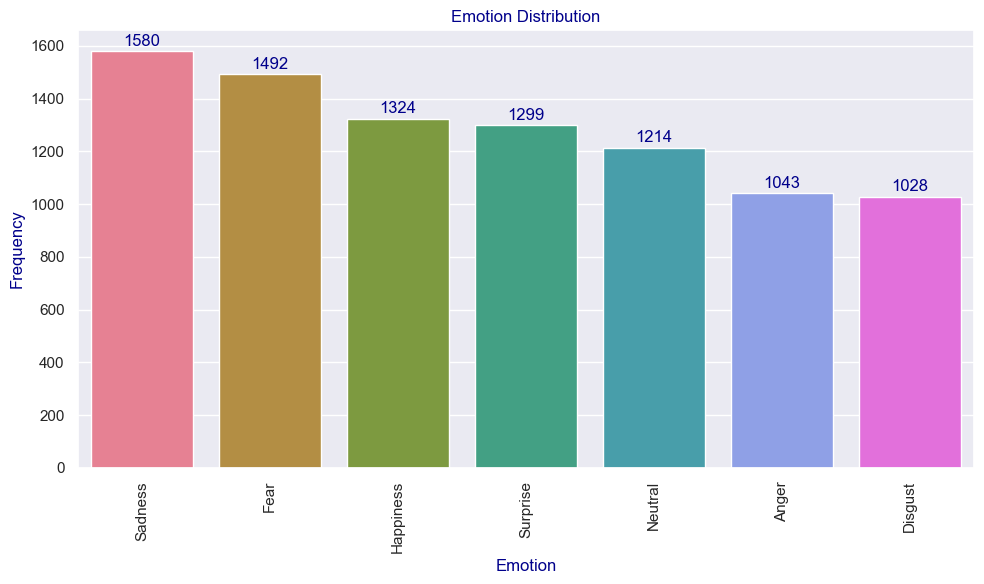

In [108]:
grafico(4)
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(x="Emotion", data=data,order= data['Emotion'].value_counts().index,palette="husl")
plt.xlabel('Emotion', color="Darkblue")
plt.xticks(rotation=90)
plt.ylabel('Frequency', color='Darkblue')
plt.title('Emotion Distribution', color='Darkblue')
for i, value in enumerate(data['Emotion'].value_counts()):
    plt.text(i, value+20, str(value),ha='center',color='Darkblue')
plt.tight_layout()
plt.show() 

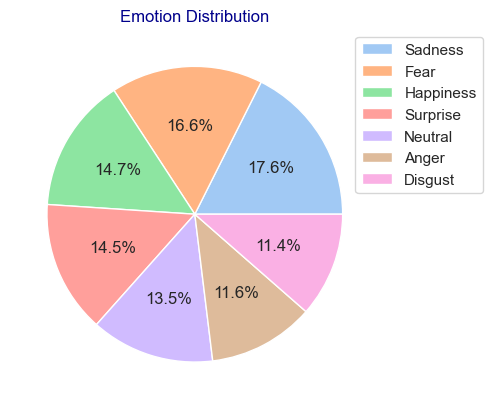

In [109]:
grafico(3)
plt.pie(data['Emotion'].value_counts(), autopct='%1.1f%%')
plt.title('Emotion Distribution', color='Darkblue')
plt.legend(data['Emotion'].value_counts().index, loc='upper right', bbox_to_anchor=(1.3, 1))

In [110]:
pd.DataFrame({'V. Absolutos':data['Emotion'].value_counts(),'V. Relativos (%)':(data['Emotion'].value_counts()*100/data.shape[0]).round(2)})

,V. Absolutos,V. Relativos (%)
Emotion,,
Sadness,1580,17.59
Fear,1492,16.61
Happiness,1324,14.74
Surprise,1299,14.47
Neutral,1214,13.52
Anger,1043,11.61
Disgust,1028,11.45


In [111]:
textounico = ' '.join(map(str, data['Text']))
len(textounico)

782108

In [112]:
nlp = spacy.load("en_core_web_lg")
chunk_size = 1000000
chunks = [textounico[i:i + chunk_size] for i in range(0, len(textounico), chunk_size)]
words = []
for chunk in chunks:
    doc = nlp(chunk)
    words.extend([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])
print(f"Total de palavras processadas: {len(words)}")

Total de palavras processadas: 63493


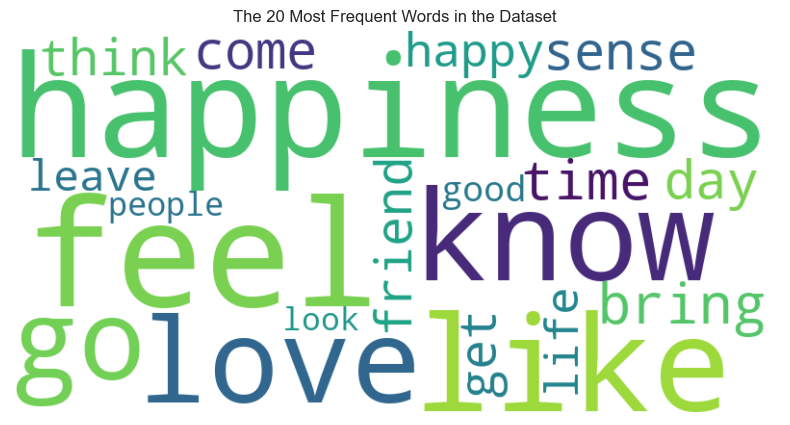

In [113]:
word_frequencies = Counter(words)
top_10_words = dict(word_frequencies.most_common(20))
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate_from_frequencies(top_10_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The 20 Most Frequent Words in the Dataset")
plt.show()

In [114]:
chunk_size = 1000000
entity_counts = Counter()
chunks = [textounico[i:i + chunk_size] for i in range(0, len(textounico), chunk_size)]
words = []
for chunk in chunks:
    doc = nlp(chunk)
    for ent in doc.ents:
        entity_counts[ent.label_] += 1
total_entities = sum(entity_counts.values())
entity_percentages = {ent: (count / total_entities) * 100 for ent, count in entity_counts.items()}

In [115]:
dfentitycounts = pd.DataFrame.from_dict(entity_counts, orient='index', columns=['Valores Absolutos'])
total = dfentitycounts['Valores Absolutos'].sum()
dfentitycounts['Valores Relativos (%)'] = (dfentitycounts['Valores Absolutos'] / total) * 100
dfentitycounts.round(2)

,Valores Absolutos,Valores Relativos (%)
CARDINAL,1592,25.50
ORG,736,11.79
PERSON,1229,19.69
NORP,147,2.35
WORK_OF_ART,89,1.43
DATE,1210,19.38
GPE,366,5.86
ORDINAL,168,2.69
LOC,37,0.59
TIME,403,6.46


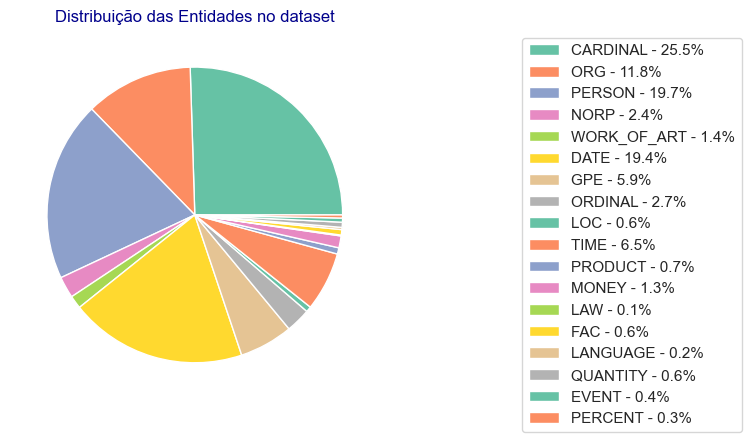

In [116]:
grafico(2)
plt.pie(dfentitycounts['Valores Relativos (%)'])
plt.title('Distribuição das Entidades no dataset', color='Darkblue')
labels = [f"{entidade} - {percent:.1f}%" for entidade, percent in zip(dfentitycounts.index, dfentitycounts['Valores Relativos (%)'])]
plt.legend(labels, loc='upper right', bbox_to_anchor=(2, 1))


In [117]:
sentimento = TextBlob(textounico).sentiment
sentimento

Sentiment(polarity=0.09171479996234572, subjectivity=0.5355671960947742)

In [118]:
print("O nosso dataset é composto por ",data.shape[0]," linhas e",data.shape[1]," colunas")

O nosso dataset é composto por  8980  linhas e 3  colunas


In [18]:
nlp = spacy.load("en_core_web_lg")
stop_words = set(stopwords.words('english'))
sia = SentimentIntensityAnalyzer()
def enrich_text_pipeline(text):
    if not isinstance(text, str):
        return {"text": "", "ner": [], "pos": [], "sentiment": 0.0}
    try:
        text = nfx.remove_userhandles(text.lower().strip())
        text = nfx.remove_urls(text)
        text = nfx.remove_stopwords(text)
        text = nfx.remove_puncts(text)
        
        doc = nlp(text)
        tokens = [
            token.lemma_.lower()
            for token in doc
            if token.is_alpha and token.lemma_.lower() not in stop_words
        ]
        cleaned_text = ' '.join(tokens)
        named_entities = [(ent.text, ent.label_) for ent in doc.ents]
        pos_tags = [(token.text, token.pos_) for token in doc]
        sentiment = sia.polarity_scores(cleaned_text)['compound']

        return {
            "text": cleaned_text,
            "ner": named_entities,
            "pos": pos_tags,
            "sentiment": sentiment
        }

    except Exception as e:
        print(f"[Erro] {e}")
        return {"text": "", "ner": [], "pos": [], "sentiment": 0.0}

In [17]:
def anonymize_selected_entities(text):
    doc = nlp(text)
    new_tokens = []
    entidades_a_remover = {"CARDINAL", "ORG", "PERSON", "DATE"}
    last_idx = 0
    for ent in doc.ents:
        if ent.label_ in entidades_a_remover:
            new_tokens.append(text[last_idx:ent.start_char])
            last_idx = ent.end_char  
    new_tokens.append(text[last_idx:]) 
    return ''.join(new_tokens)

In [16]:
valid_words = set(nltk_words.words())
def reduce_excessive_repeats_smart(text):
    def reduce_word(word):
        if word.lower() in valid_words:
            return word
        return re.sub(r'(.)\1{2,}', r'\1\1', word)
    return ' '.join(reduce_word(w) for w in text.split())


In [15]:
def remove_repeated_words(text):
    return re.sub(r'\b(\w+)(\s+\1\b)+', r'\1', text, flags=re.IGNORECASE)

In [14]:
def clean_text_spacy(text, additional_stopwords=set()):
    doc = nlp(text)
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop       
        and not token.is_punct            
        and not token.like_num               
        and token.text.lower() not in additional_stopwords
    ]
    return ' '.join(tokens)


In [13]:
def split_hashtag(hashtag):
    hashtag_body = hashtag[1:]
    if any(c.isupper() for c in hashtag_body):
        split_text = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', hashtag_body)
        return split_text.lower()
    else:
        split_words = wordninja.split(hashtag_body)
        return " ".join(split_words)
def process_text(text):
    processed_words = []
    for word in text.split():
        if word.startswith('#'):
            processed_words.append(split_hashtag(word))
        else:
            processed_words.append(word)
    return ' '.join(processed_words)

In [12]:
def corrigir_erros_comuns(text):
    correcoes = {
        "luv": "love",
        "gr8": "great",
        "ur": "your",
        "u": "you",
        "r": "are",
        "ya": "you",
        "im": "i am",
        "dont": "do not",
        "cant": "cannot",
        "wont": "will not",
        "idk": "i do not know",
        "omg": "oh my god",
        "omfg": "oh my fucking god",
        "wtf": "what the fuck",
        "lmao": "laughing my ass off",
        "lol": "laughing out loud",
        "tho": "though",
        "thx": "thanks",
        "pls": "please",
        "bf":"boyfriend",
        "ikr" : "i know right",
        "plz": "please",
        "gonna": "going to",
        "wanna": "want to",
        "gotta": "got to",
        "ain't": "is not",
        "cuz": "because",
        "n":"and",
        "r":"are",
        "bc": "because",
        "b4": "before",
        "btw": "by the way",
        "omw": "on my way",
        "kinda": "kind of",
        "dis":"this",
        "idk": "i do not know",
        "gf":"girlfriend",
        "gimme":"give me",
        "lemme": "let me",
        "gimme": "give me",
        "txt":"text",
        "nigga":"nigger",
        "wut":"what",
        "tn":"tonight",
        "awk":"awkward",
        "wit":"whit",
        "dis":"this",
        "smh": "shaking my head",
        "tbh": "to be honest",
        "nah":"no",
        "yeah":"yes",
        "fb":"Facebook",
        "eva":"ever",
        "OML":"oh my lord",
        "nite" : "night ",
        "ew":"so disgusting",
        "fml": "for mother loard",
        "bout":"about",
        "imma":"I am going to",
        "fuk": "fuck",
        "fukin": "fucking",
        "smdh":"Shaking my damn head",
        "iv":"  have",
        "fuking": "fucking",
        "lvl":"level",
        "smmfh":"Shaking my fucking head",
        "rip":"rest in peace",
        "smfh":"Shaking my fucking head",
        "lvs":"levels",
        "fuckin": "fucking",
        "dat":"that",
        "ppl":"people",
        "bc":"because",
        "nigga":"nigger",
        "ya'll": "you all",
        "da":"the",
        "yall": "you all",
        "coz": "because",
        "brb": "be right back",
        "jk":"joking",
        "gtg":"got to go",
        "otha": "other",
        "gtf":"Get the fuck out",
        "talkin":"talking",
        "lil":"little",
        "&":"and",
        "smh":"shaking my head",
        "ma":"my",
        "afk": "away from keyboard",
        "str8":"straight",
        "tyvm":"thank you very much",
        "wit":"with",
        "tldr": "too long didn't read",
        "tonite":"tonight",
        "ikr": "i know right",
        "kno":"know",
        "bou":"about",
        "xmas":"Christmas",
        "hw":"Homework",
        "tv":"television",
        "Brb":"be right back",
        "sat": "saturday",
        "wat":"what",
        "dm": "direct message"
    }
    for errado, certo in correcoes.items():
        text = re.sub(rf'\b{re.escape(errado)}\b', certo, text)
        return text
    

In [11]:
def substituir_emojis(text):
    return emoji.demojize(text, delimiters=(" ", " "))

In [10]:
def remove_low_tfidf_words(texts, threshold=0.01):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()   
    cleaned_texts = []
    for doc_index, doc in enumerate(texts):
        tfidf_scores = tfidf_matrix[doc_index].toarray().flatten()
        doc_words = doc.split()
        word_tfidf = dict(zip(feature_names, tfidf_scores))
        filtered_words = [word for word in doc_words if word in word_tfidf and word_tfidf[word] >= threshold]       
        cleaned_texts.append(' '.join(filtered_words))
    return cleaned_texts

In [96]:
data.to_csv("Dataset\\dataset_paracorrigir.csv", index=False, encoding='ISO-8859-1')


In [20]:
data = pd.read_excel("Dataset\\dataset_paracorrigir.xlsx")
data

,Text,Emotion,en
0,- great time to think about how to make to our...,Fear,en
1,- Those damn hoes in Tyga's video just upset m...,Disgust,en
2,what! Uou crazy! RT @SoloDolo254: “@omgitstpha...,Disgust,en
3,! RT @_DynastyP: #ThingsThirstyPeopleDo Kiss m...,Disgust,en
4,! RT @TheLovelyShanel: I FUCKING HATE PUBLIC &...,Disgust,en
...,...,...,...
8975,"So all the m&m's eaten, house neatly decorated...",Surprise,en
8976,"Son is back home, I still have to wrap a prese...",Surprise,en
8977,Son made a super cool one. Can't put it on Twi...,Surprise,en
8978,"So the Sinterklaas presents have been bought, ...",Surprise,en


In [ ]:
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(corrigir_symspell)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].astype(str).str.lower()
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'&quot;.*?&quot;', '', regex=True)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(process_text)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(fix_text)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(fix)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'\bÃ[\wÂ¢â€™“”]+\b', '', regex=True, case=False)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'Ã¢Â¬Ã¢Â¬', '', regex=True, case=False)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'\s+', ' ', regex=True).str.strip()
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'mÃ¬ Ã¬Â²Ã¬Â¶Ã®ÂµÃ¬Â²Ã¬Â£', '', regex=True, case=False)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'Ã©', 'é', regex=True, case=False)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'Ã®', 'î', regex=True, case=False)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'\b&amp\b', ' ', regex=True)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'\S+@\S+', ' ', regex=True)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'@\S+', ' ', regex=True)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'http\S+|https\S+|www\S+', ' ', regex=True)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(anonymize_selected_entities)

In [ ]:
nlp = spacy.load("en_core_web_lg")
stop_words = set(stopwords.words('english'))
tqdm.pandas()
data['enriched'] = data['Text'].progress_apply(enrich_text_pipeline)
data['cleaned_text'] = data['enriched'].apply(lambda x: x['text'])
data['sentiment'] = data['enriched'].apply(lambda x: x['sentiment'])
data['entities'] = data['enriched'].apply(lambda x: x['ner'])
data['pos_tags'] = data['enriched'].apply(lambda x: x['pos'])
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(substituir_emojis)
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(lambda x: contractions.fix(x))
data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'\d+',  ' ', regex=True)
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(corrigir_erros_comuns)
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(reduce_excessive_repeats_smart)
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(remove_repeated_words)
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(lambda x: clean_text_spacy(x, additional_stopwords={'rt','amp', 'rhoa', 'lol', 'omfg'}))
data.loc[:, 'cleaned_text'] = remove_low_tfidf_words(data['cleaned_text'], threshold=0.01)
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(lambda x: re.sub(f"[{re.escape(string.punctuation)}]", " ", x))
data.loc[:, 'tokens'] = data['cleaned_text'].apply(word_tokenize)
data

100%|██████████| 8980/8980 [01:00<00:00, 148.57it/s]


,Text,Emotion,en,enriched,cleaned_text,sentiment,entities,pos_tags,tokens
0,- great time to think about how to make to our...,Fear,en,"{'text': 'great time think world amp free', 'n...",great time think world free,0.8126,[],"[( , SPACE), (great, ADJ), (time, NOUN), (thin...","[great, time, think, world, free]"
1,- Those damn hoes in Tyga's video just upset m...,Disgust,en,{'text': 'damn hoe tygas video upset hope vide...,damn hoe tygas video upset hope video worth,-0.1280,[],"[( , SPACE), (damn, ADJ), (hoes, NOUN), (tygas...","[damn, hoe, tygas, video, upset, hope, video, ..."
2,what! Uou crazy! RT @SoloDolo254: “@omgitstpha...,Disgust,en,{'text': 'uou crazy rt white castle slider tho...,uou crazy white castle slider,-0.3400,[],"[(what, PRON), (uou, AUX), (crazy, ADJ), (rt, ...","[uou, crazy, white, castle, slider]"
3,! RT @_DynastyP: #ThingsThirstyPeopleDo Kiss m...,Disgust,en,{'text': 'rt thingsthirstypeopledo kiss person...,thingsthirstypeopledo kiss person mouth,0.4215,[],"[( , SPACE), (rt, PROPN), (#, PROPN), (thingst...","[thingsthirstypeopledo, kiss, person, mouth]"
4,! RT @TheLovelyShanel: I FUCKING HATE PUBLIC &...,Disgust,en,{'text': 'rt fucking hate public amp school ba...,fucking hate public school bathroomss themm sh...,-0.6115,[],"[( , SPACE), (rt, PROPN), (fucking, INTJ), (ha...","[fucking, hate, public, school, bathroomss, th..."
...,...,...,...,...,...,...,...,...,...
8975,"So all the m&m's eaten, house neatly decorated...",Surprise,en,{'text': 'mms eat house neatly decorate neat s...,mms eat house neatly decorate neat shower dres...,0.8750,"[(mms, ORG)]","[(mms, PROPN), (eaten, VERB), (house, NOUN), (...","[mms, eat, house, neatly, decorate, neat, show..."
8976,"Son is back home, I still have to wrap a prese...",Surprise,en,"{'text': 'son home wrap present print poem', '...",son home wrap present print poem,0.0000,"[(son home wrap, ORG)]","[(son, PROPN), (home, PROPN), (wrap, PROPN), (...","[son, home, wrap, present, print, poem]"
8977,Son made a super cool one. Can't put it on Twi...,Surprise,en,{'text': 'son super cool one twitter though re...,son super cool twitter reason surprise anymore,0.8074,[],"[(son, NOUN), (super, ADV), (cool, ADJ), (one,...","[son, super, cool, twitter, reason, surprise, ..."
8978,"So the Sinterklaas presents have been bought, ...",Surprise,en,{'text': 'sinterklaas present buy write poem s...,sinterklaas present buy write poem sinterklaas...,0.3612,"[(sinterklaas presents, PERSON), (sinterklaas ...","[(sinterklaas, NOUN), (presents, NOUN), (bough...","[sinterklaas, present, buy, write, poem, sinte..."


In [22]:
emocoeslist = {"Sadness":0, "Happiness":1, "Disgust":2, "Anger":3, "Fear":4, "Surprise":5, "Neutral":6}
data = data.drop(columns=['en'])
data['Emotion_num'] = data['Emotion'].map(emocoeslist)
data = data[data['Text'].str.strip() != ""]
data = data[data['cleaned_text'].str.strip() != ""]
data = data[data['Text'].str.split().apply(len) > 1]
data = data[data['cleaned_text'].str.split().apply(len) > 1]
data = data.drop_duplicates(subset='Text').reset_index(drop=True)
data = data.drop_duplicates(subset='cleaned_text').reset_index(drop=True)
data

,Text,Emotion,enriched,cleaned_text,sentiment,entities,pos_tags,tokens,Emotion_num
0,- great time to think about how to make to our...,Fear,"{'text': 'great time think world amp free', 'n...",great time think world free,0.8126,[],"[( , SPACE), (great, ADJ), (time, NOUN), (thin...","[great, time, think, world, free]",4
1,- Those damn hoes in Tyga's video just upset m...,Disgust,{'text': 'damn hoe tygas video upset hope vide...,damn hoe tygas video upset hope video worth,-0.1280,[],"[( , SPACE), (damn, ADJ), (hoes, NOUN), (tygas...","[damn, hoe, tygas, video, upset, hope, video, ...",2
2,what! Uou crazy! RT @SoloDolo254: “@omgitstpha...,Disgust,{'text': 'uou crazy rt white castle slider tho...,uou crazy white castle slider,-0.3400,[],"[(what, PRON), (uou, AUX), (crazy, ADJ), (rt, ...","[uou, crazy, white, castle, slider]",2
3,! RT @_DynastyP: #ThingsThirstyPeopleDo Kiss m...,Disgust,{'text': 'rt thingsthirstypeopledo kiss person...,thingsthirstypeopledo kiss person mouth,0.4215,[],"[( , SPACE), (rt, PROPN), (#, PROPN), (thingst...","[thingsthirstypeopledo, kiss, person, mouth]",2
4,! RT @TheLovelyShanel: I FUCKING HATE PUBLIC &...,Disgust,{'text': 'rt fucking hate public amp school ba...,fucking hate public school bathroomss themm sh...,-0.6115,[],"[( , SPACE), (rt, PROPN), (fucking, INTJ), (ha...","[fucking, hate, public, school, bathroomss, th...",2
...,...,...,...,...,...,...,...,...,...
8015,"So all the m&m's eaten, house neatly decorated...",Surprise,{'text': 'mms eat house neatly decorate neat s...,mms eat house neatly decorate neat shower dres...,0.8750,"[(mms, ORG)]","[(mms, PROPN), (eaten, VERB), (house, NOUN), (...","[mms, eat, house, neatly, decorate, neat, show...",5
8016,"Son is back home, I still have to wrap a prese...",Surprise,"{'text': 'son home wrap present print poem', '...",son home wrap present print poem,0.0000,"[(son home wrap, ORG)]","[(son, PROPN), (home, PROPN), (wrap, PROPN), (...","[son, home, wrap, present, print, poem]",5
8017,Son made a super cool one. Can't put it on Twi...,Surprise,{'text': 'son super cool one twitter though re...,son super cool twitter reason surprise anymore,0.8074,[],"[(son, NOUN), (super, ADV), (cool, ADJ), (one,...","[son, super, cool, twitter, reason, surprise, ...",5
8018,"So the Sinterklaas presents have been bought, ...",Surprise,{'text': 'sinterklaas present buy write poem s...,sinterklaas present buy write poem sinterklaas...,0.3612,"[(sinterklaas presents, PERSON), (sinterklaas ...","[(sinterklaas, NOUN), (presents, NOUN), (bough...","[sinterklaas, present, buy, write, poem, sinte...",5


C:\Users\garci\AppData\Local\Temp\ipykernel_13532\1215207054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Emotion", data=data,order= data['Emotion'].value_counts().index,palette="husl")


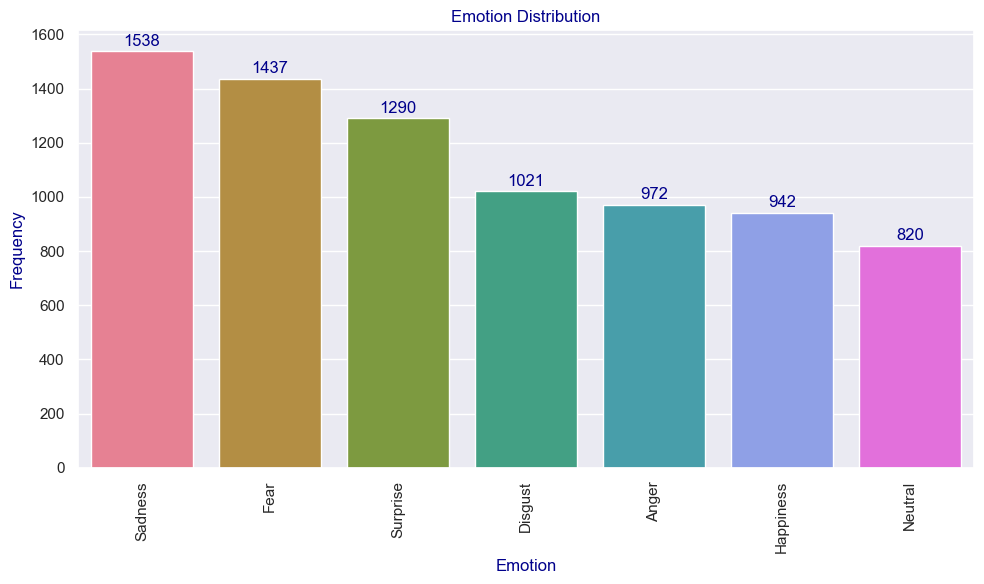

In [23]:
grafico(4)
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(x="Emotion", data=data,order= data['Emotion'].value_counts().index,palette="husl")
plt.xlabel('Emotion', color="Darkblue")
plt.xticks(rotation=90)
plt.ylabel('Frequency', color='Darkblue')
plt.title('Emotion Distribution', color='Darkblue')
for i, value in enumerate(data['Emotion'].value_counts()):
    plt.text(i, value+20, str(value),ha='center',color='Darkblue')
plt.tight_layout()
plt.show() 

In [24]:
textounico = ' '.join(data['cleaned_text'])
len(textounico)

389270

In [25]:
nlp = spacy.load("en_core_web_lg", disable=["ner","parser"])
chunk_size = 1000000
chunks = [textounico[i:i + chunk_size] for i in range(0, len(textounico), chunk_size)]
words2 = []
for chunk in chunks:
    doc = nlp(chunk)
    words2.extend([token.lemma_ for token in doc if not token.is_stop and token.is_alpha and token.ent_type_ == ""])
print(f"Total de palavras processadas: {len(words2)}")

Total de palavras processadas: 57619


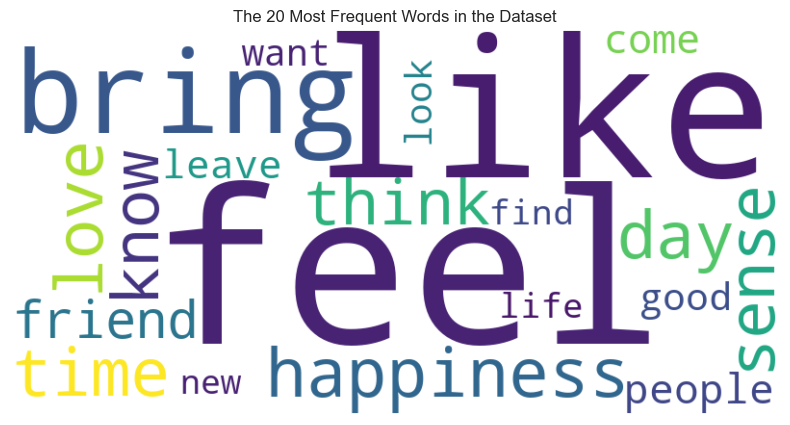

In [26]:
word_frequencies = Counter(words2)
top_20_words = dict(word_frequencies.most_common(20))
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate_from_frequencies(top_20_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The 20 Most Frequent Words in the Dataset")
plt.show()

In [27]:
sentimento = TextBlob(textounico).sentiment
sentimento

Sentiment(polarity=0.0565708958677388, subjectivity=0.5599956805300559)

In [28]:
data.to_csv("Dataset\\datasetlimpo.csv", index=False)


In [6]:
data = pd.read_csv("Dataset\\datasetlimpo.csv")
data

,Text,Emotion,enriched,cleaned_text,sentiment,entities,pos_tags,tokens,Emotion_num
0,- great time to think about how to make to our...,Fear,"{'text': 'great time think world amp free', 'n...",great time think world free,0.8126,[],"[(' ', 'SPACE'), ('great', 'ADJ'), ('time', 'N...","['great', 'time', 'think', 'world', 'free']",4
1,- Those damn hoes in Tyga's video just upset m...,Disgust,{'text': 'damn hoe tygas video upset hope vide...,damn hoe tygas video upset hope video worth,-0.1280,[],"[(' ', 'SPACE'), ('damn', 'ADJ'), ('hoes', 'NO...","['damn', 'hoe', 'tygas', 'video', 'upset', 'ho...",2
2,what! Uou crazy! RT @SoloDolo254: “@omgitstpha...,Disgust,{'text': 'uou crazy rt white castle slider tho...,uou crazy white castle slider,-0.3400,[],"[('what', 'PRON'), ('uou', 'AUX'), ('crazy', '...","['uou', 'crazy', 'white', 'castle', 'slider']",2
3,! RT @_DynastyP: #ThingsThirstyPeopleDo Kiss m...,Disgust,{'text': 'rt thingsthirstypeopledo kiss person...,thingsthirstypeopledo kiss person mouth,0.4215,[],"[(' ', 'SPACE'), ('rt', 'PROPN'), ('#', 'PROPN...","['thingsthirstypeopledo', 'kiss', 'person', 'm...",2
4,! RT @TheLovelyShanel: I FUCKING HATE PUBLIC &...,Disgust,{'text': 'rt fucking hate public amp school ba...,fucking hate public school bathroomss themm sh...,-0.6115,[],"[(' ', 'SPACE'), ('rt', 'PROPN'), ('fucking', ...","['fucking', 'hate', 'public', 'school', 'bathr...",2
...,...,...,...,...,...,...,...,...,...
8015,"So all the m&m's eaten, house neatly decorated...",Surprise,{'text': 'mms eat house neatly decorate neat s...,mms eat house neatly decorate neat shower dres...,0.8750,"[('mms', 'ORG')]","[('mms', 'PROPN'), ('eaten', 'VERB'), ('house'...","['mms', 'eat', 'house', 'neatly', 'decorate', ...",5
8016,"Son is back home, I still have to wrap a prese...",Surprise,"{'text': 'son home wrap present print poem', '...",son home wrap present print poem,0.0000,"[('son home wrap', 'ORG')]","[('son', 'PROPN'), ('home', 'PROPN'), ('wrap',...","['son', 'home', 'wrap', 'present', 'print', 'p...",5
8017,Son made a super cool one. Can't put it on Twi...,Surprise,{'text': 'son super cool one twitter though re...,son super cool twitter reason surprise anymore,0.8074,[],"[('son', 'NOUN'), ('super', 'ADV'), ('cool', '...","['son', 'super', 'cool', 'twitter', 'reason', ...",5
8018,"So the Sinterklaas presents have been bought, ...",Surprise,{'text': 'sinterklaas present buy write poem s...,sinterklaas present buy write poem sinterklaas...,0.3612,"[('sinterklaas presents', 'PERSON'), ('sinterk...","[('sinterklaas', 'NOUN'), ('presents', 'NOUN')...","['sinterklaas', 'present', 'buy', 'write', 'po...",5


In [7]:
data = data.dropna()
data = data.drop_duplicates(subset='cleaned_text', keep='first').reset_index(drop=True)
data = data[data['Text'].str.split().apply(len) > 1]
data

,Text,Emotion,enriched,cleaned_text,sentiment,entities,pos_tags,tokens,Emotion_num
0,- great time to think about how to make to our...,Fear,"{'text': 'great time think world amp free', 'n...",great time think world free,0.8126,[],"[(' ', 'SPACE'), ('great', 'ADJ'), ('time', 'N...","['great', 'time', 'think', 'world', 'free']",4
1,- Those damn hoes in Tyga's video just upset m...,Disgust,{'text': 'damn hoe tygas video upset hope vide...,damn hoe tygas video upset hope video worth,-0.1280,[],"[(' ', 'SPACE'), ('damn', 'ADJ'), ('hoes', 'NO...","['damn', 'hoe', 'tygas', 'video', 'upset', 'ho...",2
2,what! Uou crazy! RT @SoloDolo254: “@omgitstpha...,Disgust,{'text': 'uou crazy rt white castle slider tho...,uou crazy white castle slider,-0.3400,[],"[('what', 'PRON'), ('uou', 'AUX'), ('crazy', '...","['uou', 'crazy', 'white', 'castle', 'slider']",2
3,! RT @_DynastyP: #ThingsThirstyPeopleDo Kiss m...,Disgust,{'text': 'rt thingsthirstypeopledo kiss person...,thingsthirstypeopledo kiss person mouth,0.4215,[],"[(' ', 'SPACE'), ('rt', 'PROPN'), ('#', 'PROPN...","['thingsthirstypeopledo', 'kiss', 'person', 'm...",2
4,! RT @TheLovelyShanel: I FUCKING HATE PUBLIC &...,Disgust,{'text': 'rt fucking hate public amp school ba...,fucking hate public school bathroomss themm sh...,-0.6115,[],"[(' ', 'SPACE'), ('rt', 'PROPN'), ('fucking', ...","['fucking', 'hate', 'public', 'school', 'bathr...",2
...,...,...,...,...,...,...,...,...,...
8015,"So all the m&m's eaten, house neatly decorated...",Surprise,{'text': 'mms eat house neatly decorate neat s...,mms eat house neatly decorate neat shower dres...,0.8750,"[('mms', 'ORG')]","[('mms', 'PROPN'), ('eaten', 'VERB'), ('house'...","['mms', 'eat', 'house', 'neatly', 'decorate', ...",5
8016,"Son is back home, I still have to wrap a prese...",Surprise,"{'text': 'son home wrap present print poem', '...",son home wrap present print poem,0.0000,"[('son home wrap', 'ORG')]","[('son', 'PROPN'), ('home', 'PROPN'), ('wrap',...","['son', 'home', 'wrap', 'present', 'print', 'p...",5
8017,Son made a super cool one. Can't put it on Twi...,Surprise,{'text': 'son super cool one twitter though re...,son super cool twitter reason surprise anymore,0.8074,[],"[('son', 'NOUN'), ('super', 'ADV'), ('cool', '...","['son', 'super', 'cool', 'twitter', 'reason', ...",5
8018,"So the Sinterklaas presents have been bought, ...",Surprise,{'text': 'sinterklaas present buy write poem s...,sinterklaas present buy write poem sinterklaas...,0.3612,"[('sinterklaas presents', 'PERSON'), ('sinterk...","[('sinterklaas', 'NOUN'), ('presents', 'NOUN')...","['sinterklaas', 'present', 'buy', 'write', 'po...",5


In [8]:
for col in ['Text', 'enriched', 'entities', 'pos_tags', 'tokens']:
    data[col] = data[col].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))


In [9]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [ ]:
#X = data['cleaned_text']
#y= data['Emotion_num']
#X = X.reset_index(drop=True)  
#y = y.reset_index(drop=True)
#print(X.iloc[0])
#print(y[0])

great time think world free
4


In [5]:
with open('Recursos\\X.pickle','wb') as f:
    pickle.dump(X,f)
    
with open('Recursos\\y.pickle','wb') as f:
    pickle.dump(y,f)

# Models


<center>

### Regressão Logistica

</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [ ] [Decision Tree](#secao999)
      - [ ] [Random Forest](#secao998)
      - [ ] [XGBoost](#secao997)
      - [ ] [K-Nearest Neighbors](#secao996)
      - [ ] [SVM](#secao995)
      - [X] **[Regressão logística](#secao994)**
      - [ ] [Naive Bayes](#secao993)
      - [ ] [CNN (com pré treino FastText)](#secao993)

In [ ]:
#X = data['cleaned_text']
#y= data['Emotion_num']

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', StandardScaler(), ['sentiment'])
])
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['lbfgs'],
    'classifier__penalty': ['l2'],
}
pipeline = Pipeline([('vectorizer', preprocessor),('classifier', LogisticRegression(random_state=42,max_iter=1000))])
grid_search = GridSearchCV(pipeline,param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_search.fit(X, y)
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor F1-Score:", grid_search.best_score_)

Melhores Parâmetros: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Melhor F1-Score: 0.6364807146050174


In [22]:
#vectorizer = TfidfVectorizer(max_features = 7000, min_df = 1, max_df = 0.9,ngram_range=(1,1))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizerRL_tese.joblib')

['Parte1/EmotionFromText/vectorizerRL_tese.joblib']

In [23]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [ ]:
#param_grid = {
#    'C': [0.1, 1, 10],
#    'penalty': ['l2'],
#    'solver': ['lbfgs', 'saga'],
#    'max_iter': [500, 1000]
#}

#all_params = list(ParameterGrid(param_grid))
#total = len(all_params)
#best_score = -np.inf
#best_params = None

#start = time.time()
#pbar = tqdm(total=total, desc="GridSearch Progress")

#for params in all_params:
#    try:
#        model = LogisticRegression(random_state=42, **params)
#        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
#        mean_score = scores.mean()

#        if mean_score > best_score:
#            best_score = mean_score
#            best_params = params

#    except Exception as e:
#        print(f"Erro com params {params}: {e}")

#    pbar.update(1)

#pbar.close()
#end = time.time()

#print("Melhores Parâmetros:", best_params)
#print("Melhor F1 ponderado:", best_score)

In [ ]:
classifier = LogisticRegression(C=1,
                                solver='saga',
                                max_iter=500,
                                class_weight='balanced',
                                random_state = 42,
                                penalty='l2')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred2 = classifier.predict(X_val)

In [32]:
joblib.dump(classifier, 'Parte1/EmotionFromText/logistic_regression_model_tese.joblib')

['Parte1/EmotionFromText/logistic_regression_model_tese.joblib']

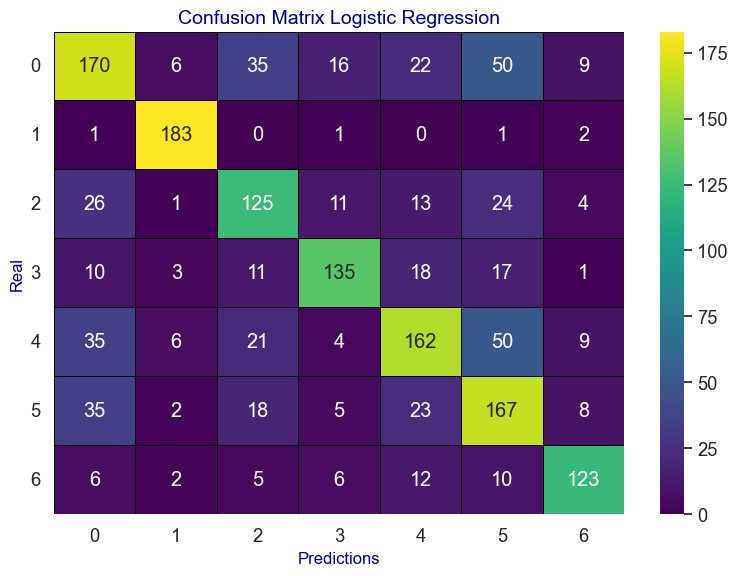

In [25]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis', xticklabels=classifier.classes_ , yticklabels=classifier.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)
plt.title('Confusion Matrix Logistic Regression', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [26]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), y_pred.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.60      0.55      0.58       308
           1       0.90      0.97      0.94       188
           2       0.58      0.61      0.60       204
           3       0.76      0.69      0.72       195
           4       0.65      0.56      0.60       287
           5       0.52      0.65      0.58       258
           6       0.79      0.75      0.77       164

    accuracy                           0.66      1604
   macro avg       0.69      0.68      0.68      1604
weighted avg       0.67      0.66      0.66      1604



In [29]:
resultados = avaliar_modelo(y_test, y_pred, y_val, y_pred2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.6640,0.6637,0.6640,0.6679
Validação,0.6721,0.6720,0.6721,0.6737


<center>

### Naive Bayes
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [ ] [Decision Tree](#secao999)
      - [ ] [Random Forest](#secao998)
      - [ ] [XGBoost](#secao997)
      - [ ] [K-Nearest Neighbors](#secao996)
      - [ ] [SVM](#secao995)
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] **[Naive Bayes](#secao993)**
      - [ ] [CNN (com pré treino FastText)](#secao993)

In [9]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [66]:
#X = data['cleaned_text']
#y= data['Emotion_num']

In [10]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', MinMaxScaler(), ['sentiment']) #não aceita valores negativos
])

In [ ]:
#pipeline = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', MultinomialNB())])
#param_grid = {
#    'vectorizer__max_features': [1000, 2000, 3000],
#    'vectorizer__min_df': [1, 2, 3],
#    'vectorizer__max_df': [0.4, 0.5, 0.6, 0.7],
#    'vectorizer__ngram_range': [(1, 3), (1, 4), (1, 5)]
#}
#pipeline = Pipeline([('vectorizer', preprocessor),('classifier', MultinomialNB())])
#grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
#grid_search.fit(X, y)
#print("Melhores Parâmetros:", grid_search.best_params_)
#print("Melhor F1-Score:", grid_search.best_score_)

Melhores Parâmetros: {'classifier__alpha': 0.5}
Melhor F1-Score: 0.6052276832528894


In [11]:
#vectorizer = TfidfVectorizer(max_features = 3000, min_df = 1, max_df = 0.1,ngram_range=(1, 1))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizerNB_tese.joblib')

['Parte1/EmotionFromText/vectorizerNB_tese.joblib']

In [12]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [ ]:
param_grid = {'alpha': [0.5, 0.6, 0.7]}
grid_search = GridSearchCV(estimator=MultinomialNB(),param_grid=param_grid,scoring='f1_weighted',cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor Acurácia:", grid_search.best_score_)

Melhores Parâmetros: {'alpha': 0.6}
Melhor Acurácia: 0.600147420454024


In [19]:
naive=MultinomialNB(alpha= 0.6)
naive.fit(X_train, y_train)
previsoesnb = naive.predict(X_test)
previsoesnb2 = naive.predict(X_val)

In [20]:
joblib.dump(naive, 'Parte1/EmotionFromText/TeseNB_model.joblib')

['Parte1/EmotionFromText/TeseNB_model.joblib']

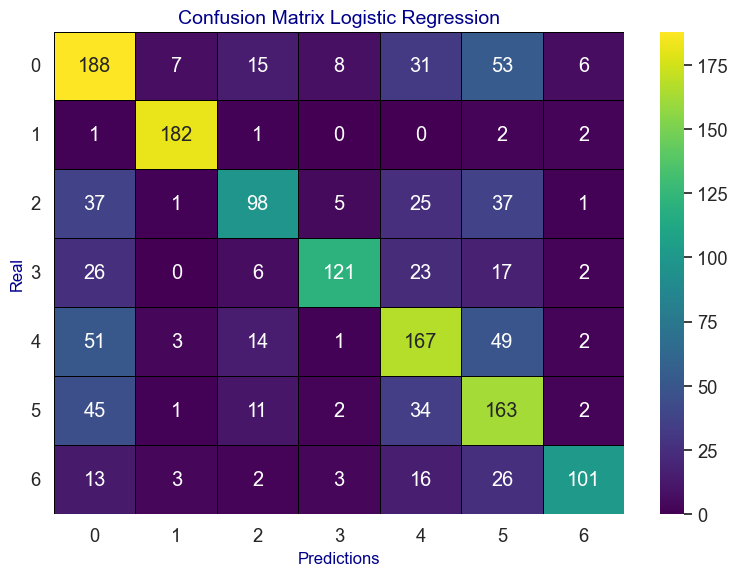

In [21]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesnb), annot=True, fmt='d', cmap='viridis', xticklabels=naive.classes_ , yticklabels=naive.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Logistic Regression', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [22]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesnb.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.52      0.61      0.56       308
           1       0.92      0.97      0.95       188
           2       0.67      0.48      0.56       204
           3       0.86      0.62      0.72       195
           4       0.56      0.58      0.57       287
           5       0.47      0.63      0.54       258
           6       0.87      0.62      0.72       164

    accuracy                           0.64      1604
   macro avg       0.70      0.64      0.66      1604
weighted avg       0.66      0.64      0.64      1604



In [23]:
resultados = avaliar_modelo(y_test, previsoesnb, y_val, previsoesnb2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.6359,0.6405,0.6359,0.6637
Validação,0.6652,0.6714,0.6652,0.6947


<center>

### XBoost
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [ ] [Decision Tree](#secao999)
      - [ ] [Random Forest](#secao998)
      - [X] **[XGBoost](#secao997)**
      - [ ] [K-Nearest Neighbors](#secao996)
      - [ ] [SVM](#secao995)
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] ~~[Naive Bayes](#secao993)~~
      - [ ] [CNN (com pré treino Fastetext)](#secao993)

In [24]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [ ]:
#X = data['cleaned_text']
#y= data['Emotion_num']

In [25]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', MinMaxScaler(), ['sentiment']) 
])

In [ ]:
#pipeline = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', XGBClassifier())])
#param_grid = {
#    'vectorizer__max_features': [1000, 2000, 3000],
#    'vectorizer__min_df': [1, 2, 3],
#    'vectorizer__max_df': [0.4, 0.5, 0.6, 0.7],
#    'vectorizer__ngram_range': [(1, 3), (1, 4), (1, 5)]
#}
#pipeline = Pipeline([('vectorizer', preprocessor),('classifier', XGBClassifier())])
#grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
#grid_search.fit(X, y)
#print("Melhores Parâmetros:", grid_search.best_params_)
#print("Melhor F1-Score:", grid_search.best_score_)

In [26]:
#vectorizer = TfidfVectorizer(max_features = 4000, min_df = 1, max_df = 0.1,ngram_range=(1,1))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizerXGB_tese.joblib')

['Parte1/EmotionFromText/vectorizerXGB_tese.joblib']

In [27]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [ ]:
param_grid = {'n_estimators': [200, 300, 400],
              'learning_rate': [0.2, 0.3, 0.4],
              'max_depth': [10, 15, 20],
              'subsample': [0.8, 1.0],
              'colsample_bytree': [0.4, 0.5, 0.6]}
all_params = list(ParameterGrid(param_grid))
total = len(all_params)
best_score = -np.inf
best_params = None
start = time.time()
pbar = tqdm(total=total, desc="GridSearch Progress")
for params in all_params:
    model = XGBClassifier(random_state=42, **params, n_jobs=-1)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_params = params

    pbar.update(1)

pbar.close()
end = time.time()

print("Melhores Parâmetros:", best_params)
print("Melhor F1 ponderado:", best_score)

In [28]:
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
xgb = XGBClassifier(colsample_bytree=0.4, learning_rate= 0.3, max_depth=10, n_estimators=200, subsample=1.0)
xgb.fit(X_train, y_train, sample_weight=sample_weights)
previsoesxgb = xgb.predict(X_test)
previsoesxgb2 = xgb.predict(X_val)

In [29]:
joblib.dump(xgb, 'Parte1/EmotionFromText/xgb_model_tese.joblib')

['Parte1/EmotionFromText/xgb_model_tese.joblib']

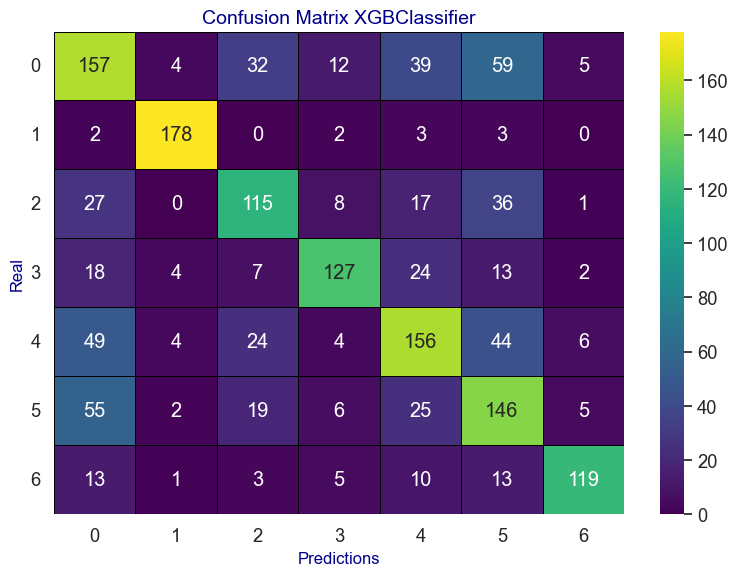

In [30]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesxgb), annot=True, fmt='d', cmap='viridis', xticklabels=xgb.classes_ , yticklabels=xgb.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix XGBClassifier', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [31]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesxgb.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.49      0.51      0.50       308
           1       0.92      0.95      0.93       188
           2       0.57      0.56      0.57       204
           3       0.77      0.65      0.71       195
           4       0.57      0.54      0.56       287
           5       0.46      0.57      0.51       258
           6       0.86      0.73      0.79       164

    accuracy                           0.62      1604
   macro avg       0.67      0.64      0.65      1604
weighted avg       0.63      0.62      0.63      1604



In [32]:
resultados = avaliar_modelo(y_test, previsoesxgb, y_val, previsoesxgb2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.6222,0.6260,0.6222,0.6341
Validação,0.6428,0.6435,0.6428,0.6465



<center>

### Decision Tree
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [X] **[Decision Tree](#secao999)**
      - [ ] [Random Forest](#secao998)
      - [X] ~~[XGBoost](#secao997)~~
      - [ ] [K-Nearest Neighbors](#secao996)
      - [ ] [SVM](#secao995)
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] ~~[Naive Bayes](#secao993)~~
      - [ ] [CNN (com pré treino Fasttext)](#secao993)


In [ ]:
#X = data['cleaned_text']
#y= data['Emotion_num']

In [65]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [66]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', MinMaxScaler(), ['sentiment']) 
])

In [ ]:
#pipeline = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', DecisionTreeClassifier())])
#param_grid = {
#    'vectorizer__max_features': [1000, 2000, 3000],
#    'vectorizer__min_df': [1, 2, 3],
#    'vectorizer__max_df': [0.4, 0.5, 0.6, 0.7],
#    'vectorizer__ngram_range': [(1, 3), (1, 4), (1, 5)]
#}
#grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
#grid_search.fit(X, y)
#print("Melhores Parâmetros:", grid_search.best_params_)
#print("Melhor F1-Score:", grid_search.best_score_)

Melhores Parâmetros: {'vectorizer__max_df': 0.5, 'vectorizer__max_features': 2000, 'vectorizer__min_df': 2, 'vectorizer__ngram_range': (1, 4)}
Melhor F1-Score: 0.48570006782294906


In [67]:
#vectorizer = TfidfVectorizer(max_features = 2000, min_df = 2,max_df = 0.5,ngram_range=(1,4))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizerDT_tese.joblib')

['Parte1/EmotionFromText/vectorizerDT_tese.joblib']

In [68]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 10],
    'max_depth': [None, 10],
    'min_samples_leaf': [1, 4],
    'max_features': [None, 'sqrt'],
    'ccp_alpha': [0.0, 0.05], 
    'max_leaf_nodes': [None, 50], 
    'min_weight_fraction_leaf': [0.0, 0.05],
}
all_params = list(ParameterGrid(param_grid))
total = len(all_params)
best_score = -np.inf
best_params = None
start = time.time()
pbar = tqdm(total=total, desc="GridSearch Progress")
for params in all_params:
    model = DecisionTreeClassifier(random_state=42, **params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_params = params
    pbar.update(1)
pbar.close()
end = time.time()
print("Melhores Parâmetros:", best_params)
print("Melhor F1 ponderado:", best_score)

In [69]:
arvore = DecisionTreeClassifier(max_depth=None,
                                ccp_alpha=0.0, 
                                criterion='gini',
                                class_weight='balanced',
                                max_features=None,
                                max_leaf_nodes=None,
                                min_samples_leaf=1,
                                min_samples_split=10,
                                splitter='best',
                                min_weight_fraction_leaf=0.0)
arvore.fit(X_train,y_train)
previsoesdt = arvore.predict(X_test)
previsoesdt2 = arvore.predict(X_val)

In [70]:
joblib.dump(arvore, 'Parte1/EmotionFromText/DT_tese.joblib')

['Parte1/EmotionFromText/DT_tese.joblib']

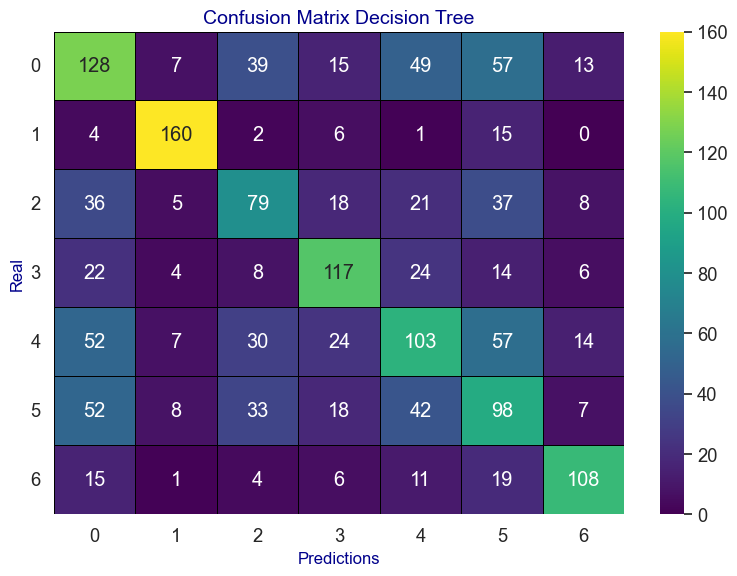

In [71]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesdt), annot=True, fmt='d', cmap='viridis', xticklabels=arvore.classes_ , yticklabels=arvore.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Decision Tree', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [72]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesdt.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.41      0.42      0.41       308
           1       0.83      0.85      0.84       188
           2       0.41      0.39      0.40       204
           3       0.57      0.60      0.59       195
           4       0.41      0.36      0.38       287
           5       0.33      0.38      0.35       258
           6       0.69      0.66      0.68       164

    accuracy                           0.49      1604
   macro avg       0.52      0.52      0.52      1604
weighted avg       0.50      0.49      0.49      1604



In [73]:
resultados = avaliar_modelo(y_test, previsoesdt, y_val, previsoesdt2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.4944,0.4944,0.4944,0.4957
Validação,0.4882,0.4826,0.4882,0.4809


<center>

### Random Forest
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [X] ~~[Decision Tree](#secao999)~~
      - [X] **[Random Forest](#secao998)**
      - [X] ~~[XGBoost](#secao997)~~
      - [ ] [K-Nearest Neighbors](#secao996)
      - [ ] [SVM](#secao995)
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] ~~[Naive Bayes](#secao993)~~
      - [ ] [CNN (com pré treino Fasttext)](#secao993)

In [ ]:
#X = data['cleaned_text']
#y= data['Emotion_num']

In [74]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [75]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', MinMaxScaler(), ['sentiment']) 
])

In [ ]:
#pipeline = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', RandomForestClassifier())])
#param_grid = {
#    'vectorizer__max_features': [13000, 14000, 15000],
#    'vectorizer__min_df': [1, 2, 3],
#    'vectorizer__max_df': [0.7, 0.8, 0.9],
#    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]
#}
#grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
#grid_search.fit(X, y)
#print("Melhores Parâmetros:", grid_search.best_params_)
#print("Melhor F1-Score:", grid_search.best_score_)

Melhores Parâmetros: {'vectorizer__max_df': 0.7, 'vectorizer__max_features': 14000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 1)}
Melhor F1-Score: 0.559492765055701


In [76]:
#vectorizer = TfidfVectorizer(max_features = 14000, min_df = 3, max_df = 0.7,ngram_range= (1,1))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizerRF_tese.joblib')

['Parte1/EmotionFromText/vectorizerRF_tese.joblib']

In [77]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10],
    'max_depth': [None, 20],
    'min_samples_leaf': [1, 4],
    'max_features': [None, 'sqrt'],
    'ccp_alpha': [0.0, 0.05],
    'max_leaf_nodes': [None, 50],
    'min_weight_fraction_leaf': [0.0, 0.05],
}
all_params = list(ParameterGrid(param_grid))
total = len(all_params)
best_score = -np.inf
best_params = None
start = time.time()
pbar = tqdm(total=total, desc="GridSearch Progress")

for params in all_params:
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_params = params
    pbar.update(1)
pbar.close()
end = time.time()
print("Melhores Parâmetros:", best_params)
print("Melhor F1 ponderado:", best_score)

In [78]:
randomforest = RandomForestClassifier(class_weight='balanced',
                                      ccp_alpha=0.0,
                                      criterion='gini',
                                      n_estimators=200,
                                      max_leaf_nodes=None,
                                      min_samples_leaf=1, 
                                      max_depth=None,
                                      min_weight_fraction_leaf=0.0,
                                      min_samples_split=10,
                                      max_features='sqrt',
                                      random_state=42)
randomforest.fit(X_train, y_train)
previsoesrf = randomforest.predict(X_test)
previsoesrf2 = randomforest.predict(X_val)

In [79]:
joblib.dump(randomforest, 'Parte1/EmotionFromText/RT_Tese.joblib')

['Parte1/EmotionFromText/RT_Tese.joblib']

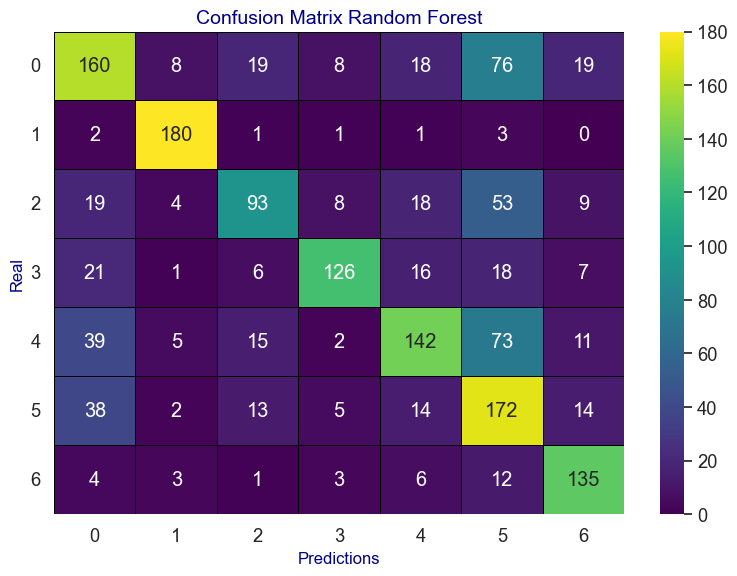

In [80]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesrf), annot=True, fmt='d', cmap='viridis', xticklabels=randomforest.classes_ , yticklabels=randomforest.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Random Forest', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [81]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesrf.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.57      0.52      0.54       308
           1       0.89      0.96      0.92       188
           2       0.63      0.46      0.53       204
           3       0.82      0.65      0.72       195
           4       0.66      0.49      0.57       287
           5       0.42      0.67      0.52       258
           6       0.69      0.82      0.75       164

    accuracy                           0.63      1604
   macro avg       0.67      0.65      0.65      1604
weighted avg       0.65      0.63      0.63      1604



In [82]:
resultados = avaliar_modelo(y_test, previsoesrf, y_val, previsoesrf2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.6284,0.6285,0.6284,0.6495
Validação,0.6297,0.6283,0.6297,0.6451


<center>

### K-Nearest Neighbors
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [X] ~~[Decision Tree](#secao999)~~
      - [X] ~~[Random Forest](#secao998)~~
      - [X] ~~[XGBoost](#secao997)~~
      - [X] **[K-Nearest Neighbors](#secao996)**
      - [ ] [SVM](#secao995)
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] ~~[Naive Bayes](#secao993)~~
      - [ ] [CNN (com pré treino GloVe)](#secao993)

In [83]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [ ]:
#X = data['cleaned_text']
#y= data['Emotion_num']

In [84]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', MinMaxScaler(), ['sentiment']) 
])

In [ ]:
#pipeline = Pipeline([('vectorizer', TfidfVectorizer()),('classifier',  KNeighborsClassifier())])
#param_grid = {
#    'vectorizer__max_features': [100, 500, 1000],
#    'vectorizer__min_df': [2, 3, 4],
#    'vectorizer__max_df': [0.1, 0.2, 0.3, 0.4],
#    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]
#}
#grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
#grid_search.fit(X, y)
#print("Melhores Parâmetros:", grid_search.best_params_)
#print("Melhor F1-Score:", grid_search.best_score_)

Melhores Parâmetros: {'vectorizer__max_df': 0.1, 'vectorizer__max_features': 500, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 2)}
Melhor F1-Score: 0.3664124773471813


In [85]:
#vectorizer = TfidfVectorizer(max_features = 500, min_df = 3, max_df = 0.1,ngram_range=(1, 2))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizerKNN_tese.joblib')

['Parte1/EmotionFromText/vectorizerKNN_tese.joblib']

In [86]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50],
}
all_params = list(ParameterGrid(param_grid))
total = len(all_params)
best_score = -np.inf
best_params = None
start = time.time()
pbar = tqdm(total=total, desc="GridSearch Progress")
for params in all_params:
    model = KNeighborsClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
    mean_score = scores.mean()
    
    if mean_score > best_score:
        best_score = mean_score
        best_params = params

    pbar.update(1)

pbar.close()
end = time.time()

print("Melhores Parâmetros:", best_params)
print("Melhor F1 ponderado:", best_score)

In [87]:
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=5, weights='distance', leaf_size= 10, p=1, metric='manhattan')
knn.fit(X_train, y_train)
previsoesknn = knn.predict(X_test)
previsoesknn2 = knn.predict(X_val)

In [88]:
joblib.dump(knn, 'Parte1/EmotionFromText/KNN_tese.joblib')

['Parte1/EmotionFromText/KNN_tese.joblib']

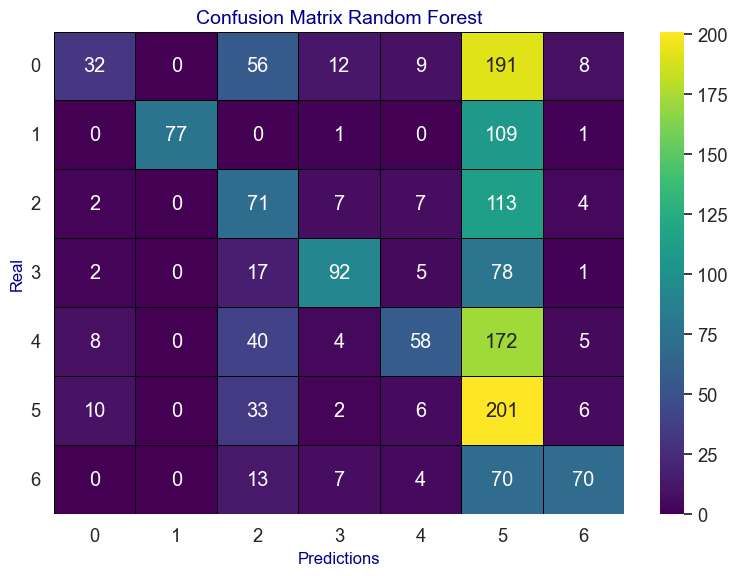

In [89]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesknn), annot=True, fmt='d', cmap='viridis', xticklabels=knn.classes_ , yticklabels=knn.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Random Forest', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [90]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesknn.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.59      0.10      0.18       308
           1       1.00      0.41      0.58       188
           2       0.31      0.35      0.33       204
           3       0.74      0.47      0.57       195
           4       0.65      0.20      0.31       287
           5       0.22      0.78      0.34       258
           6       0.74      0.43      0.54       164

    accuracy                           0.37      1604
   macro avg       0.61      0.39      0.41      1604
weighted avg       0.59      0.37      0.38      1604



In [91]:
resultados = avaliar_modelo(y_test, previsoesknn, y_val, previsoesknn2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.3747,0.3783,0.3747,0.5863
Validação,0.3828,0.3899,0.3828,0.5888


<center>

### SVC
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [X] ~~[Decision Tree](#secao999)~~
      - [X] ~~[Random Forest](#secao998)~~
      - [X] ~~[XGBoost](#secao997)~~
      - [X] ~~[K-Nearest Neighbors](#secao996)~~
      - [X] **[SVM](#secao995)**
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] ~~[Naive Bayes](#secao993)~~
      - [ ] [CNN (com pré treino FastText)](#secao993)

In [8]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [ ]:
#X = data['cleaned_text']
#y= data['Emotion_num']

In [9]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', MinMaxScaler(), ['sentiment']) 
])

In [ ]:
#pipeline = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', SVC())])
#param_grid = {'vectorizer__max_features': [5000, 6000, 7000],
#              'vectorizer__min_df': [1, 2, 3],
#              'vectorizer__max_df': [0.1, 0.2, 0.3, 0.4],
#              'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]
#}
#grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
#grid_search.fit(X, y)
#print("Melhores Parâmetros:", grid_search.best_params_)
#print("Melhor F1-Score:", grid_search.best_score_)

Melhores Parâmetros: {'vectorizer__max_df': 0.1, 'vectorizer__max_features': 5000, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 1)}
Melhor F1-Score: 0.5839006809216964


In [10]:
#vectorizer = TfidfVectorizer(max_features = 5000, min_df = 1, max_df = 0.1,ngram_range=(1, 1))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizersvm_tese.joblib')

['Parte1/EmotionFromText/vectorizersvm_tese.joblib']

In [11]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [ ]:
param_grid = {
    'C': [1, 10], 
    'kernel': ['linear', 'rbf'], 
    'degree': [3],
    'gamma': ['scale', 0.01], 
    'class_weight': [None], 
    'shrinking': [True] 
}
all_params = list(ParameterGrid(param_grid))
total = len(all_params)

best_score = -np.inf
best_params = None

start = time.time()
pbar = tqdm(total=total, desc="GridSearch Progress")

for params in all_params:
    model = SVC(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_params = params

    pbar.update(1)

pbar.close()
end = time.time()
print("Melhores Parâmetros:", best_params)
print("Melhor F1 ponderado:", best_score)

In [12]:
SVCmodel = SVC(C=10,degree=3, gamma=0.01,kernel='rbf',shrinking=True, class_weight='balanced',)
SVCmodel.fit(X_train, y_train)
previsoessvc = SVCmodel.predict(X_test)
previsoessvc2 = SVCmodel.predict(X_val)

In [13]:
joblib.dump(SVCmodel, 'Parte1/EmotionFromText/SVM_tese.joblib')

['Parte1/EmotionFromText/SVM_tese.joblib']

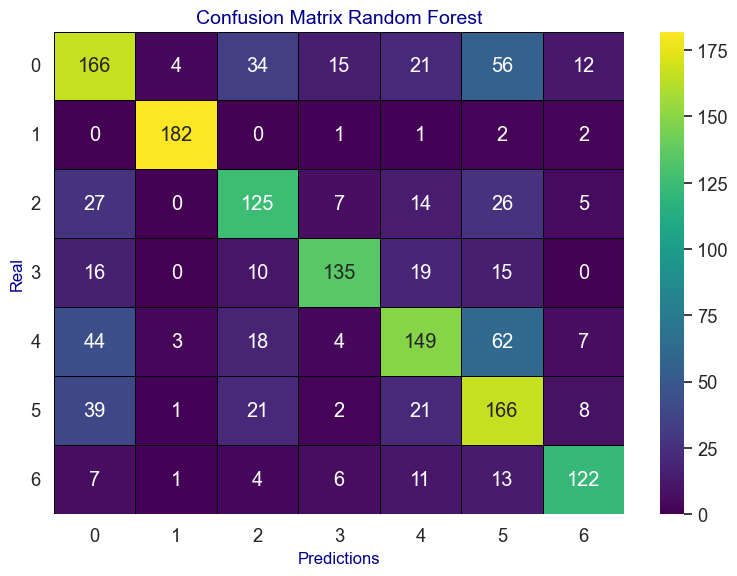

In [14]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoessvc), annot=True, fmt='d', cmap='viridis', xticklabels=SVCmodel.classes_ , yticklabels=SVCmodel.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Random Forest', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoessvc.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55       308
           1       0.95      0.97      0.96       188
           2       0.59      0.61      0.60       204
           3       0.79      0.69      0.74       195
           4       0.63      0.52      0.57       287
           5       0.49      0.64      0.56       258
           6       0.78      0.74      0.76       164

    accuracy                           0.65      1604
   macro avg       0.68      0.67      0.68      1604
weighted avg       0.66      0.65      0.65      1604



In [16]:
resultados = avaliar_modelo(y_test, previsoessvc, y_val, previsoessvc2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.6515,0.6532,0.6515,0.6613
Validação,0.6690,0.6713,0.6690,0.6778


<center>

### CNN (com pré treino GLove)
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [X] ~~[Decision Tree](#secao999)~~
      - [X] ~~[Random Forest](#secao998)~~
      - [X] ~~[XGBoost](#secao997)~~
      - [X] ~~[K-Nearest Neighbors](#secao996)~~
      - [X] ~~[SVM](#secao995)~~
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] ~~[Naive Bayes](#secao993)~~
      - [ ] **[CNN (com pré treino Glove)](#secao993)**

In [88]:
#corpus = data['cleaned_text'].tolist()
#corpus = [text for text in corpus if text.strip() != ""]
#labels = data['Emotion_num'].values

In [36]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [37]:
corpus = X.apply(lambda row: ' '.join(str(val) for val in row if pd.notnull(val)), axis=1).tolist()
labels = y.values

In [38]:
embedding_index = {}
with open("Recursos\\glove.6B.200d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = coeffs
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
padded = pad_sequences(sequences, maxlen=200, padding='post')
word_index = tokenizer.word_index
with open("Recursos\\tokenizer_glove.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
embedding_dim = 200
num_words = 20000
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
np.save("Parte1/EmotionFromText/Glove_CNN_EN_embedding_matrix.npy", embedding_matrix)

In [39]:
X_train, X_temp, y_train, y_temp = train_test_split(padded, labels, test_size=0.4, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [40]:
y_train_cat = to_categorical(y_train, num_classes=7)
y_val_cat = to_categorical(y_val, num_classes=7)
y_test_cat = to_categorical(y_test, num_classes=7)

In [42]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.9))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=1e-4, weight_decay=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │     4,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,000,000 (15.26 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,000,000 (15.26 MB)

In [43]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=3, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, mode='min')
checkpoint = ModelCheckpoint("Parte1/EmotionFromText/best_cnn_model.keras", monitor='val_loss', save_best_only=True, mode='min')
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

In [44]:
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=300,
    batch_size=16,
    callbacks=[early_stop, lr_reduce, checkpoint], class_weight=class_weights
)

Epoch 1/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1512 - loss: 6.4577 - val_accuracy: 0.1901 - val_loss: 2.8919 - learning_rate: 1.0000e-04
Epoch 2/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1772 - loss: 3.9551 - val_accuracy: 0.1827 - val_loss: 2.9019 - learning_rate: 1.0000e-04
Epoch 3/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1908 - loss: 3.1902 - val_accuracy: 0.2051 - val_loss: 2.8785 - learning_rate: 1.0000e-04
Epoch 4/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1803 - loss: 2.9828 - val_accuracy: 0.2170 - val_loss: 2.8517 - learning_rate: 1.0000e-04
Epoch 5/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1985 - loss: 2.9111 - val_accuracy: 0.2263 - val_loss: 2.8136 - learning_rate: 1.0000e-04
Epoch 6/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.2013 - loss: 2.8264 - val_accuracy: 0.2325 - val_loss: 2.7681 - learning_rate: 1.0000e-04
Epoch 7/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/ste

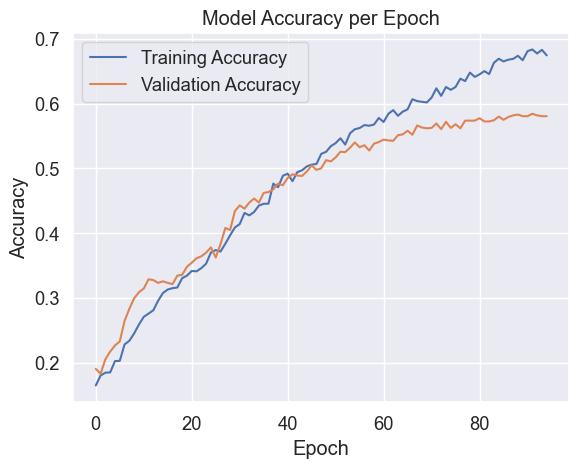

In [45]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
model_path = "Parte1/EmotionFromText/sentimentcnnmodel_tese.h5"
model.save(model_path)

You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


In [47]:
previsoesCNN = model.predict(X_test)
previsoesCNNval = model.predict(X_val)

51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [48]:
previsoesCNN2 = np.argmax(previsoesCNN, axis=1)
previsoesCNNval2 = np.argmax(previsoesCNNval, axis=1)

In [49]:
train_loss, train_accuracy = model.evaluate(X_train, y_train_cat)
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
val_loss, val_accuracy = model.evaluate(X_val, y_val_cat)

151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7912 - loss: 0.7631
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5777 - loss: 1.2735
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5749 - loss: 1.2251


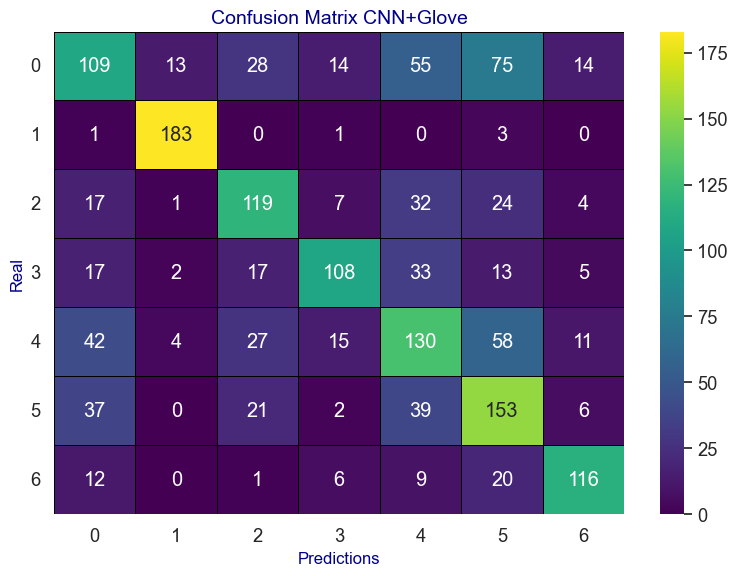

In [50]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesCNN2), annot=True, fmt='d', cmap='viridis',
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix CNN+Glove', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [51]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesCNN2.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.46      0.35      0.40       308
           1       0.90      0.97      0.94       188
           2       0.56      0.58      0.57       204
           3       0.71      0.55      0.62       195
           4       0.44      0.45      0.44       287
           5       0.44      0.59      0.51       258
           6       0.74      0.71      0.72       164

    accuracy                           0.57      1604
   macro avg       0.61      0.60      0.60      1604
weighted avg       0.58      0.57      0.57      1604



In [52]:
resultados = avaliar_modelo(y_test, previsoesCNN2, y_val, previsoesCNNval2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.5723,0.5700,0.5723,0.5768
Validação,0.5842,0.5836,0.5842,0.5900


### RNN (com pré treino GLove)

In [53]:
#corpus = data['cleaned_text'].tolist()
#corpus = [text for text in corpus if text.strip() != ""]
#labels = data['Emotion_num'].values

In [54]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [55]:
corpus = X.apply(lambda row: ' '.join(str(val) for val in row if pd.notnull(val)), axis=1).tolist()
labels = y.values

In [56]:
embedding_index = {}
with open("Recursos\\glove.6B.200d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = coeffs
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
padded = pad_sequences(sequences, maxlen=200, padding='post')
word_index = tokenizer.word_index
with open("Recursos\\tokenizer_glove.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
embedding_dim = 200
num_words=20000
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
np.save("Parte1/EmotionFromText/Glove_RNN_EN_embedding_matrix.npy", embedding_matrix)

In [57]:
X_train, X_temp, y_train, y_temp = train_test_split(padded, labels, test_size=0.4, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [58]:
y_train_cat = to_categorical(y_train, num_classes=7)
y_val_cat = to_categorical(y_val, num_classes=7)
y_test_cat = to_categorical(y_test, num_classes=7)

In [59]:
model = Sequential()
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=200,
                    trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64, return_sequences=False, dropout=0.2, recurrent_dropout=0.2)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0005, weight_decay=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

C:\Users\garci\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │     4,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,000,000 (15.26 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,000,000 (15.26 MB)

In [60]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=3, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, mode='min')
checkpoint = ModelCheckpoint("Parte1/EmotionFromText/best_rnn_model.keras", monitor='val_loss', save_best_only=True, mode='min')
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

In [61]:
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=300,
    batch_size=16,
    callbacks=[early_stop, lr_reduce, checkpoint],class_weight=class_weights
)

Epoch 1/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 64s 159ms/step - accuracy: 0.1573 - loss: 2.8356 - val_accuracy: 0.2718 - val_loss: 1.8166 - learning_rate: 5.0000e-04
Epoch 2/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 45s 150ms/step - accuracy: 0.2039 - loss: 2.1998 - val_accuracy: 0.3847 - val_loss: 1.5465 - learning_rate: 5.0000e-04
Epoch 3/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 48s 160ms/step - accuracy: 0.2676 - loss: 1.8441 - val_accuracy: 0.4034 - val_loss: 1.5135 - learning_rate: 5.0000e-04
Epoch 4/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 52s 171ms/step - accuracy: 0.3103 - loss: 1.6709 - val_accuracy: 0.4233 - val_loss: 1.4857 - learning_rate: 5.0000e-04
Epoch 5/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 50s 166ms/step - accuracy: 0.3417 - loss: 1.5645 - val_accuracy: 0.4707 - val_loss: 1.3484 - learning_rate: 5.0000e-04
Epoch 6/300
301/301 ━━━━━━━━━━━━━━━━━━━━ 52s 172ms/step - accuracy: 0.3689 - loss: 1.4585 - val_accuracy: 0.4869 - val_loss: 1.3132 - learning_rate: 5.0000e-04
Epoch 7/300
301/301 ━━━━━━━━━━━━━━━━━━━━

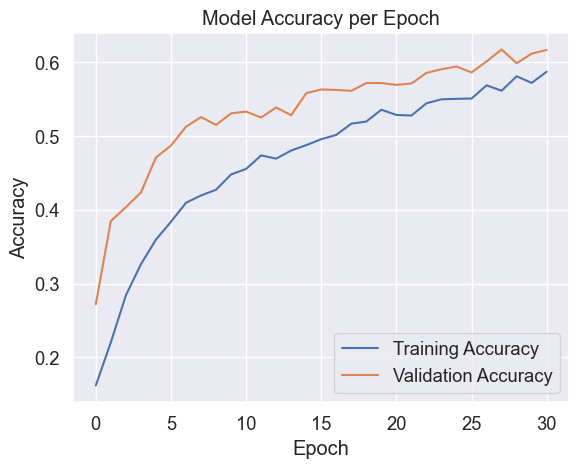

In [62]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
previsoesRNN = model.predict(X_test)
previsoesRNNval = model.predict(X_val)

51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step


In [64]:
previsoesRNN2 = np.argmax(previsoesRNN, axis=1)
previsoesRNNval2 = np.argmax(previsoesRNNval, axis=1)

In [65]:
train_loss, train_accuracy = model.evaluate(X_train, y_train_cat)
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
val_loss, val_accuracy = model.evaluate(X_val, y_val_cat)

151/151 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.6772 - loss: 0.8589
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.5755 - loss: 1.0727
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.6032 - loss: 1.0314


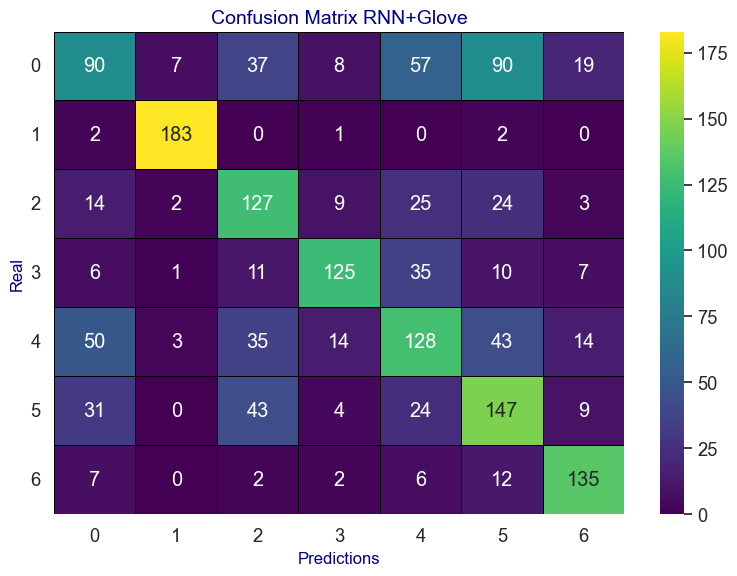

In [66]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesRNN2), annot=True, fmt='d', cmap='viridis',
            linewidths=0.5, linecolor='black', cbar=True)
plt.title('Confusion Matrix RNN+Glove', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [67]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesRNN2.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.45      0.29      0.35       308
           1       0.93      0.97      0.95       188
           2       0.50      0.62      0.55       204
           3       0.77      0.64      0.70       195
           4       0.47      0.45      0.46       287
           5       0.45      0.57      0.50       258
           6       0.72      0.82      0.77       164

    accuracy                           0.58      1604
   macro avg       0.61      0.62      0.61      1604
weighted avg       0.58      0.58      0.58      1604



In [68]:
resultados = avaliar_modelo(y_test, previsoesRNN2, y_val, previsoesRNNval2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.5829,0.5759,0.5829,0.5816
Validação,0.6172,0.6091,0.6172,0.6130


## Roberta

In [19]:
text_columns = ['cleaned_text', 'enriched', 'tokens', 'pos_tags', 'entities','Text', 'sentiment']
data['text'] = data[text_columns].astype(str).apply(lambda row: ' '.join(row.values), axis=1)

In [20]:
df = pd.DataFrame({'text': data['text'], 'label': data['Emotion_num']})
df = df[df['text'].str.strip() != ""]

In [21]:
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    df['text'].tolist(), df['label'].tolist(), test_size=0.2, stratify=df['label'], random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42)

In [22]:
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-large')
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)


In [23]:
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})
val_dataset = Dataset.from_dict({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask'],
    'labels': val_labels
})
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_labels
})

In [24]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = dict(enumerate(class_weights))

In [25]:
weights = torch.tensor(list(class_weights.values()), dtype=torch.float).to(device)
loss_fct = nn.CrossEntropyLoss(weight=weights)
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [ ]:
model = RobertaForSequenceClassification.from_pretrained('roberta-large', num_labels=7)
temp_output_dir = tempfile.mkdtemp()
training_args = TrainingArguments(
    output_dir=tempfile.mkdtemp(),
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=30,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=1e-5,
    weight_decay=1e-3,
    warmup_steps=100, #começa mais suave
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    return {'accuracy': accuracy_score(labels, preds),'f1': f1_score(labels, preds, average='weighted')}
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\garci\AppData\Roaming\Python\Python312\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [27]:
trainer.train()

  0%|          | 0/12030 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

{'eval_loss': 0.8058950901031494, 'eval_accuracy': 0.7057356608478803, 'eval_f1': 0.7039594149436602, 'eval_runtime': 13.5206, 'eval_samples_per_second': 59.317, 'eval_steps_per_second': 3.772, 'epoch': 1.0}
{'loss': 1.2085, 'grad_norm': 19.926565170288086, 'learning_rate': 9.664710813076279e-06, 'epoch': 1.25}


  0%|          | 0/51 [00:00<?, ?it/s]

{'eval_loss': 0.749352753162384, 'eval_accuracy': 0.7394014962593516, 'eval_f1': 0.7392812031619521, 'eval_runtime': 13.3353, 'eval_samples_per_second': 60.141, 'eval_steps_per_second': 3.824, 'epoch': 2.0}
{'loss': 0.6288, 'grad_norm': 23.405109405517578, 'learning_rate': 9.245599329421627e-06, 'epoch': 2.49}


  0%|          | 0/51 [00:00<?, ?it/s]

{'eval_loss': 0.7454730272293091, 'eval_accuracy': 0.7406483790523691, 'eval_f1': 0.7402986814313992, 'eval_runtime': 109.5987, 'eval_samples_per_second': 7.318, 'eval_steps_per_second': 0.465, 'epoch': 3.0}
{'loss': 0.3924, 'grad_norm': 23.14283561706543, 'learning_rate': 8.826487845766974e-06, 'epoch': 3.74}


  0%|          | 0/51 [00:00<?, ?it/s]

{'eval_loss': 0.8433857560157776, 'eval_accuracy': 0.7518703241895262, 'eval_f1': 0.7504898636445289, 'eval_runtime': 99.685, 'eval_samples_per_second': 8.045, 'eval_steps_per_second': 0.512, 'epoch': 4.0}
{'loss': 0.2257, 'grad_norm': 25.99370002746582, 'learning_rate': 8.407376362112322e-06, 'epoch': 4.99}


  0%|          | 0/51 [00:00<?, ?it/s]

{'eval_loss': 1.038873553276062, 'eval_accuracy': 0.7543640897755611, 'eval_f1': 0.7538652554637254, 'eval_runtime': 122.8973, 'eval_samples_per_second': 6.526, 'eval_steps_per_second': 0.415, 'epoch': 5.0}


  0%|          | 0/51 [00:00<?, ?it/s]

{'eval_loss': 1.2849675416946411, 'eval_accuracy': 0.7443890274314214, 'eval_f1': 0.7451331630397875, 'eval_runtime': 100.8335, 'eval_samples_per_second': 7.954, 'eval_steps_per_second': 0.506, 'epoch': 6.0}
{'loss': 0.1105, 'grad_norm': 0.06731519848108292, 'learning_rate': 7.98826487845767e-06, 'epoch': 6.23}


  0%|          | 0/51 [00:00<?, ?it/s]

{'eval_loss': 1.7550538778305054, 'eval_accuracy': 0.7443890274314214, 'eval_f1': 0.7427021391972604, 'eval_runtime': 101.0607, 'eval_samples_per_second': 7.936, 'eval_steps_per_second': 0.505, 'epoch': 7.0}
{'loss': 0.061, 'grad_norm': 1.3359454870224, 'learning_rate': 7.569153394803018e-06, 'epoch': 7.48}


  0%|          | 0/51 [00:00<?, ?it/s]

{'eval_loss': 1.7573961019515991, 'eval_accuracy': 0.7406483790523691, 'eval_f1': 0.7397402307691061, 'eval_runtime': 99.7155, 'eval_samples_per_second': 8.043, 'eval_steps_per_second': 0.511, 'epoch': 8.0}
{'train_runtime': 60093.4994, 'train_samples_per_second': 3.203, 'train_steps_per_second': 0.2, 'train_loss': 0.4120042273528558, 'epoch': 8.0}


TrainOutput(global_step=3208, training_loss=0.4120042273528558, metrics={'train_runtime': 60093.4994, 'train_samples_per_second': 3.203, 'train_steps_per_second': 0.2, 'total_flos': 1.1958745281232896e+16, 'train_loss': 0.4120042273528558, 'epoch': 8.0})

In [28]:
trainer.evaluate()

  0%|          | 0/51 [00:00<?, ?it/s]

{'eval_loss': 1.038873553276062,
 'eval_accuracy': 0.7543640897755611,
 'eval_f1': 0.7538652554637254,
 'eval_runtime': 98.9122,
 'eval_samples_per_second': 8.108,
 'eval_steps_per_second': 0.516,
 'epoch': 8.0}

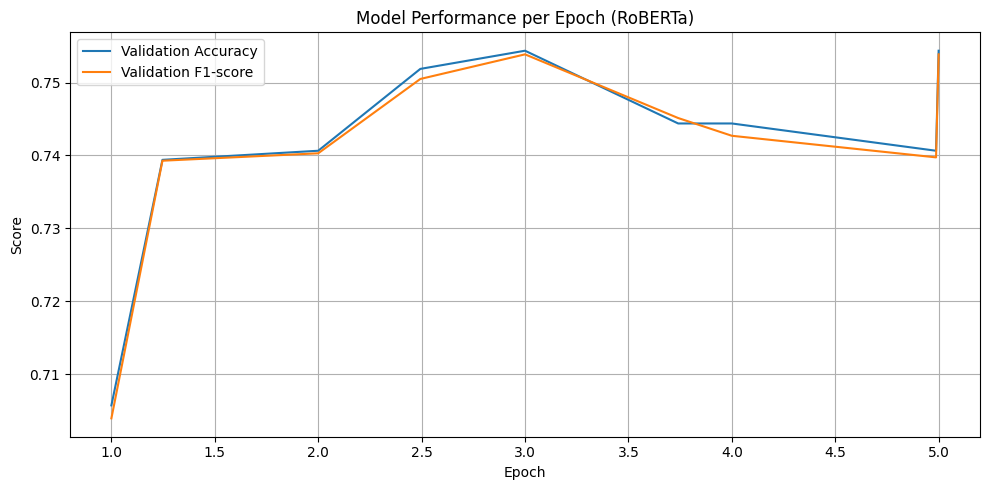

In [29]:
logs = trainer.state.log_history
epochs = []
train_acc = []
val_acc = []
val_f1 = []
for log in logs:
    if 'epoch' in log:
        epochs.append(log['epoch'])
        if 'eval_accuracy' in log:
            val_acc.append(log['eval_accuracy'])
        if 'eval_f1' in log:
            val_f1.append(log['eval_f1'])
        if 'accuracy' in log:
            train_acc.append(log['accuracy'])
plt.figure(figsize=(10, 5))
plt.plot(epochs[:len(val_acc)], val_acc, label='Validation Accuracy')
if train_acc:
    plt.plot(epochs[:len(train_acc)], train_acc, label='Training Accuracy')
plt.plot(epochs[:len(val_f1)], val_f1, label='Validation F1-score')
plt.title('Model Performance per Epoch (RoBERTa)')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
trainer.model.save_pretrained("Parte1/EmotionFromText/modelo_roberta_final")
tokenizer.save_pretrained("Parte1/EmotionFromText/tokenizer_modelo_roberta_final")

('Parte1/EmotionFromText/tokenizer_modelo_roberta_final\\tokenizer_config.json',
 'Parte1/EmotionFromText/tokenizer_modelo_roberta_final\\special_tokens_map.json',
 'Parte1/EmotionFromText/tokenizer_modelo_roberta_final\\vocab.json',
 'Parte1/EmotionFromText/tokenizer_modelo_roberta_final\\merges.txt',
 'Parte1/EmotionFromText/tokenizer_modelo_roberta_final\\added_tokens.json',
 'Parte1/EmotionFromText/tokenizer_modelo_roberta_final\\tokenizer.json')

In [ ]:
model= RobertaForSequenceClassification.from_pretrained("Parte1//EmotionFromText//modelo_roberta_final", num_labels=7)
tokenizer= RobertaTokenizerFast.from_pretrained("Parte1//EmotionFromText//tokenizer_modelo_roberta_final")
model.eval()
model = model.to(device)

In [34]:
pred_train = trainer.predict(train_dataset)
pred_val = trainer.predict(val_dataset)
pred_test = trainer.predict(test_dataset)

  0%|          | 0/401 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

In [35]:
y_test = pred_test.label_ids
y_pred_test = pred_test.predictions.argmax(axis=1)
y_val = pred_val.label_ids
y_pred_val = pred_val.predictions.argmax(axis=1)
resultados = avaliar_modelo(y_test, y_pred_test, y_val, y_pred_val)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.7182,0.7142,0.7182,0.7139
Validação,0.7544,0.7539,0.7544,0.7604


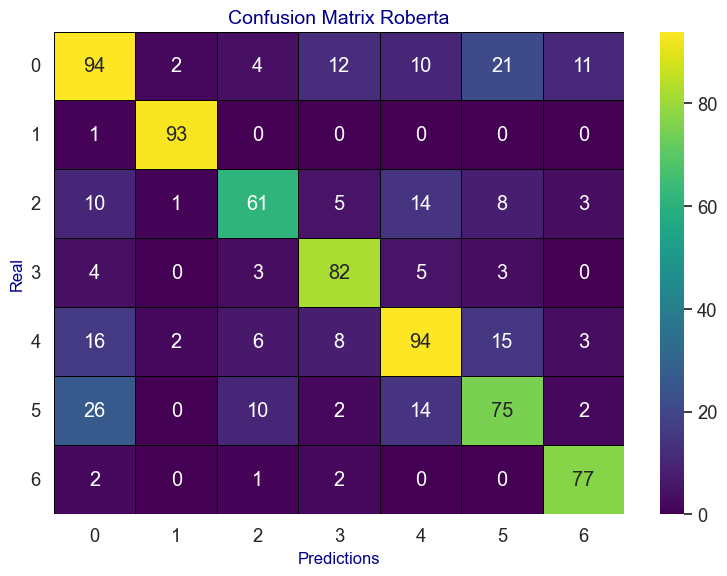

In [36]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='viridis',
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Roberta', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

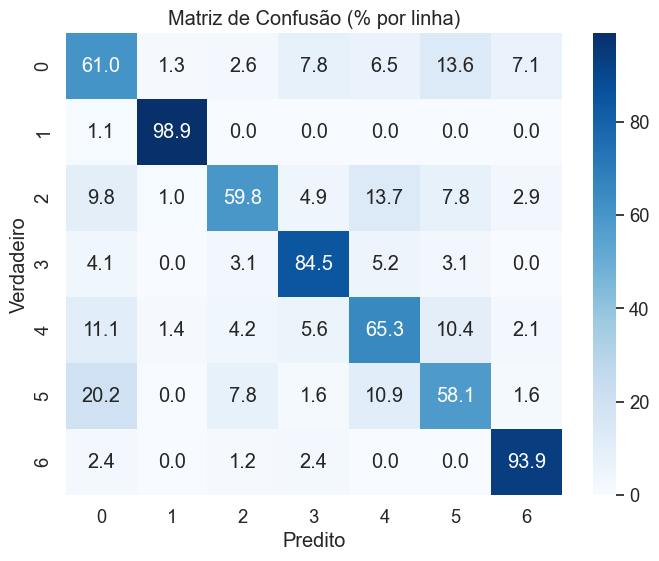

In [37]:
cm = confusion_matrix(y_test, y_pred_test)
cm_pct = cm.astype(float) / cm.sum(axis=1)[:, None] * 100
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pct, annot=True, fmt=".1f", cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão (% por linha)")
plt.show()

In [49]:
emocoeslist = {"Sadness":0, "Happiness":1, "Anger":3, "Fear":4}
classes_desejadas = list(emocoeslist.values())
indices_filtrados = [i for i, y in enumerate(y_test) if y in classes_desejadas]
y_test_filtrado = [y_test[i] for i in indices_filtrados]
y_pred_filtrado = [y_pred_test[i] for i in indices_filtrados]

In [120]:
classes_desejadas = {0, 1, 3, 4}
indices_filtrados = [i for i, y in enumerate(y_test) if y in classes_desejadas and y_pred_test[i] in classes_desejadas]
y_test_filtrado = [y_test[i] for i in indices_filtrados]
y_pred_filtrado = [y_pred_test[i] for i in indices_filtrados]


In [122]:
classes_desejadas = {0, 1, 3, 4}
indices_val = [i for i, y in enumerate(y_val) if y in classes_desejadas and y_pred_val[i] in classes_desejadas]
y_val_filtrado = [y_val[i] for i in indices_val]
y_pred_val_filtrado = [y_pred_val[i] for i in indices_val]

In [56]:
acc_4classes = accuracy_score(y_test_filtrado, y_pred_filtrado)
print(f"Accuracy real para 4 emoções: {acc_4classes:.4f}")


Accuracy real para 4 emoções: 0.8582


In [123]:
avaliar_modelo(y_test_filtrado, y_pred_filtrado, y_val_filtrado, y_pred_val_filtrado)

,Accuracy,F1-Score,Recall,Precision
Teste,0.8582,0.8572,0.8582,0.8587
Validação,0.8587,0.8589,0.8587,0.8596


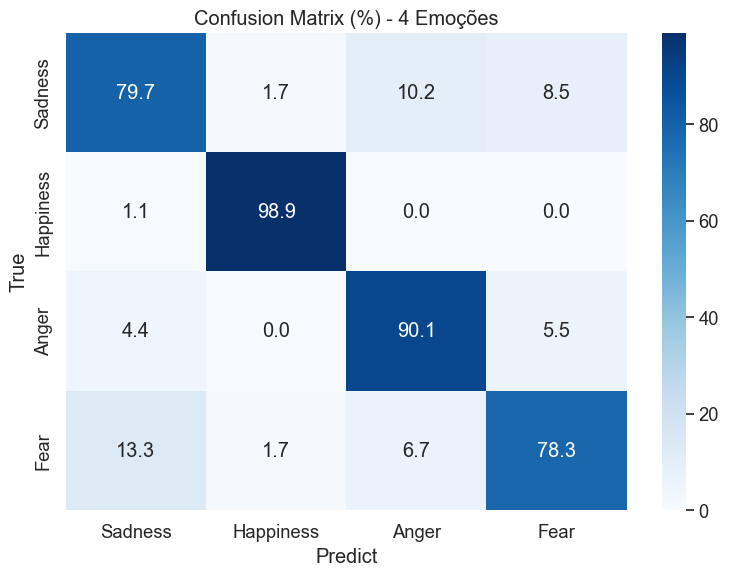

In [39]:
cm = confusion_matrix(y_test_filtrado, y_pred_filtrado, labels=classes_desejadas)
cm_pct = cm.astype(float) / cm.sum(axis=1)[:, None] * 100
label_names = [k for k, v in emocoeslist.items()]
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pct, annot=True, fmt=".1f", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predict")
plt.ylabel("True")
plt.title("Confusion Matrix (%) - 4 Emoções")
plt.tight_layout()
plt.show()

## DistilBERT

In [ ]:
text_columns = ['cleaned_text', 'enriched', 'tokens', 'pos_tags', 'entities','Text', 'sentiment']
data['text'] = data[text_columns].astype(str).apply(lambda row: ' '.join(row.values), axis=1)

In [ ]:
df = pd.DataFrame({'text': data['text'], 'label': data['Emotion_num']})
df = df[df['text'].str.strip() != ""]

In [ ]:
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    df['text'].tolist(), df['label'].tolist(), test_size=0.2, stratify=df['label'], random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42)

In [86]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

In [87]:
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})
val_dataset = Dataset.from_dict({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask'],
    'labels': val_labels
})
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_labels
})

In [ ]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = dict(enumerate(class_weights))

In [ ]:
weights = torch.tensor(list(class_weights.values()), dtype=torch.float).to(device)
loss_fct = nn.CrossEntropyLoss(weight=weights)
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [92]:
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=7)
temp_output_dir = tempfile.mkdtemp()
training_args = TrainingArguments(
    output_dir=tempfile.mkdtemp(),
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=30,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    weight_decay=1e-3,
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    return {
        'accuracy': accuracy_score(labels, preds),
        'f1': f1_score(labels, preds, average='weighted')
    }
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [93]:
trainer.train()

  0%|          | 0/12030 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

{'eval_loss': 0.8696689605712891, 'eval_accuracy': 0.6745635910224439, 'eval_f1': 0.6723880805775241, 'eval_runtime': 2.0305, 'eval_samples_per_second': 394.976, 'eval_steps_per_second': 25.117, 'epoch': 1.0}
{'loss': 1.1901, 'grad_norm': 5.887092113494873, 'learning_rate': 1.916874480465503e-05, 'epoch': 1.25}


  0%|          | 0/51 [00:00<?, ?it/s]

{'eval_loss': 0.8062329888343811, 'eval_accuracy': 0.7057356608478803, 'eval_f1': 0.7040060349867953, 'eval_runtime': 1.9826, 'eval_samples_per_second': 404.517, 'eval_steps_per_second': 25.724, 'epoch': 2.0}
{'loss': 0.6485, 'grad_norm': 11.209278106689453, 'learning_rate': 1.833748960931006e-05, 'epoch': 2.49}


  0%|          | 0/51 [00:00<?, ?it/s]

{'eval_loss': 0.8127484321594238, 'eval_accuracy': 0.7182044887780549, 'eval_f1': 0.7201052188042839, 'eval_runtime': 2.1403, 'eval_samples_per_second': 374.709, 'eval_steps_per_second': 23.828, 'epoch': 3.0}
{'loss': 0.4094, 'grad_norm': 9.953838348388672, 'learning_rate': 1.7506234413965088e-05, 'epoch': 3.74}


  0%|          | 0/51 [00:00<?, ?it/s]

{'eval_loss': 0.9288897514343262, 'eval_accuracy': 0.7119700748129676, 'eval_f1': 0.7114907072547024, 'eval_runtime': 2.1493, 'eval_samples_per_second': 373.143, 'eval_steps_per_second': 23.729, 'epoch': 4.0}
{'loss': 0.2348, 'grad_norm': 8.893298149108887, 'learning_rate': 1.6674979218620116e-05, 'epoch': 4.99}


  0%|          | 0/51 [00:00<?, ?it/s]

{'eval_loss': 1.1405248641967773, 'eval_accuracy': 0.6957605985037406, 'eval_f1': 0.694303982114218, 'eval_runtime': 2.1123, 'eval_samples_per_second': 379.683, 'eval_steps_per_second': 24.144, 'epoch': 5.0}


  0%|          | 0/51 [00:00<?, ?it/s]

{'eval_loss': 1.3490045070648193, 'eval_accuracy': 0.7007481296758105, 'eval_f1': 0.7013680052045671, 'eval_runtime': 2.1273, 'eval_samples_per_second': 376.996, 'eval_steps_per_second': 23.974, 'epoch': 6.0}
{'train_runtime': 386.9656, 'train_samples_per_second': 497.409, 'train_steps_per_second': 31.088, 'train_loss': 0.5364468036248896, 'epoch': 6.0}


TrainOutput(global_step=2406, training_loss=0.5364468036248896, metrics={'train_runtime': 386.9656, 'train_samples_per_second': 497.409, 'train_steps_per_second': 31.088, 'total_flos': 1274979921813504.0, 'train_loss': 0.5364468036248896, 'epoch': 6.0})

In [94]:
trainer.evaluate()

  0%|          | 0/51 [00:00<?, ?it/s]

{'eval_loss': 0.8127484321594238,
 'eval_accuracy': 0.7182044887780549,
 'eval_f1': 0.7201052188042839,
 'eval_runtime': 2.2907,
 'eval_samples_per_second': 350.116,
 'eval_steps_per_second': 22.264,
 'epoch': 6.0}

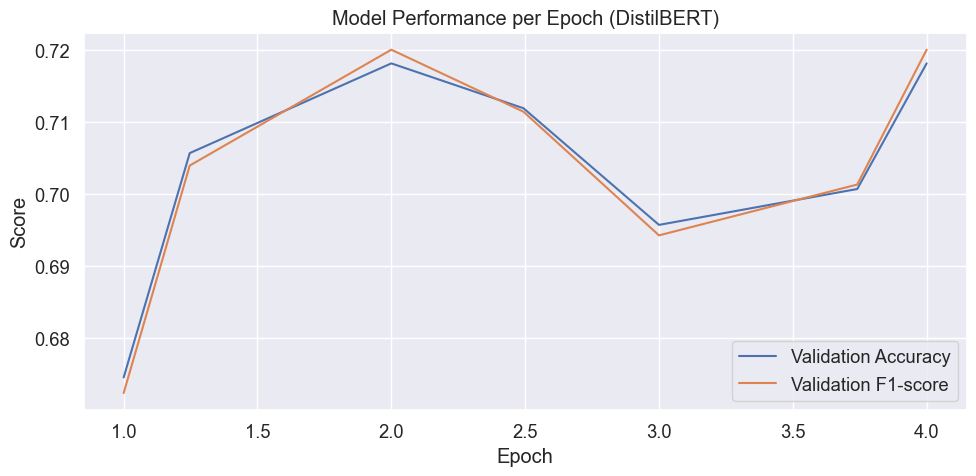

In [95]:
logs = trainer.state.log_history
epochs = []
train_acc = []
val_acc = []
val_f1 = []
for log in logs:
    if 'epoch' in log:
        epochs.append(log['epoch'])
        if 'eval_accuracy' in log:
            val_acc.append(log['eval_accuracy'])
        if 'eval_f1' in log:
            val_f1.append(log['eval_f1'])
        if 'accuracy' in log:
            train_acc.append(log['accuracy'])
plt.figure(figsize=(10, 5))
plt.plot(epochs[:len(val_acc)], val_acc, label='Validation Accuracy')
if train_acc:
    plt.plot(epochs[:len(train_acc)], train_acc, label='Training Accuracy')
plt.plot(epochs[:len(val_f1)], val_f1, label='Validation F1-score')
plt.title('Model Performance per Epoch (DistilBERT)')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
trainer.model.save_pretrained("Parte1//EmotionFromText//modelo_distilbert_final")
tokenizer.save_pretrained("Parte1//EmotionFromText//tokenizer_modelo_distilbert_final")

('Parte1//EmotionFromText//tokenizer_modelo_distilbert_final\\tokenizer_config.json',
 'Parte1//EmotionFromText//tokenizer_modelo_distilbert_final\\special_tokens_map.json',
 'Parte1//EmotionFromText//tokenizer_modelo_distilbert_final\\vocab.txt',
 'Parte1//EmotionFromText//tokenizer_modelo_distilbert_final\\added_tokens.json',
 'Parte1//EmotionFromText//tokenizer_modelo_distilbert_final\\tokenizer.json')

In [97]:
pred_train = trainer.predict(train_dataset)
pred_val = trainer.predict(val_dataset)
pred_test = trainer.predict(test_dataset)

  0%|          | 0/401 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

In [98]:
y_test = pred_test.label_ids
y_pred_test = pred_test.predictions.argmax(axis=1)
y_val = pred_val.label_ids
y_pred_val = pred_val.predictions.argmax(axis=1)
resultados = avaliar_modelo(y_test, y_pred_test, y_val, y_pred_val)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.6833,0.6842,0.6833,0.6928
Validação,0.7182,0.7201,0.7182,0.7320


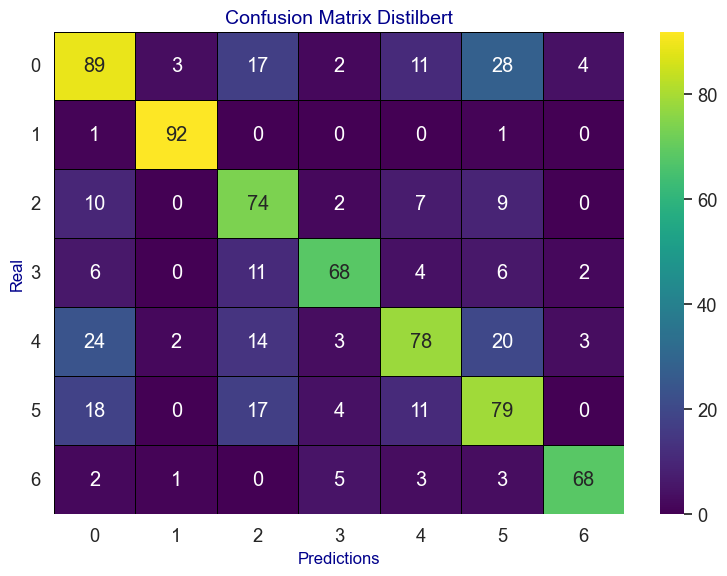

In [99]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='viridis',
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Distilbert', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()